In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
# needed to let jupyter find the module...
sys.path.append('/Users/toastcheng/Desktop/MLDS/lib/python3.6/site-packages/')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
%matplotlib inline

## Generate data

In [3]:
def sample_func(x):
    return np.sinc(x)

In [4]:
np.random.seed(1)
torch.manual_seed(1)
LR = [5e-3, 5e-3, 5e-3]
EPOCH = 10000

train_x = (2 * np.random.rand(2000)-1) * 10
train_y = sample_func(train_x)
train_x, train_y = Variable(torch.FloatTensor(train_x)), Variable(torch.FloatTensor(train_y))
train_x = train_x.unsqueeze(1)
train_y = train_y.unsqueeze(1)

Text(0.5,1,'sample function')

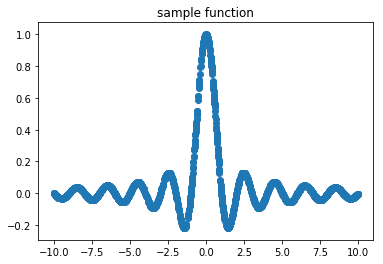

In [5]:
plt.scatter(train_x.data, train_y.data)
plt.title('sample function')

## Define Network Structure

In [6]:
class Shallow(nn.Module):
    def __init__(self):
        super(Shallow, self).__init__()
        self.fc1 = nn.Linear(1, 1880)
        self.fc2 = nn.Linear(1880, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
    
    
class Deep(nn.Module):
    def __init__(self):
        super(Deep, self).__init__()
        self.fc1 = nn.Linear(1, 30)
        self.fc2 = nn.Linear(30, 60)
        self.fc3 = nn.Linear(60, 60)
        self.fc4 = nn.Linear(60, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    

class Deeper(nn.Module):
    def __init__(self):
        super(Deeper, self).__init__()
        params1 = [1, 14, 20, 30, 30, 30, 30, 30, 30]
        params2 = [14, 20, 30, 30, 30, 30, 30, 30, 1]
        
        self.fc1 = nn.Linear(params1[0], params2[0])
        self.fc2 = nn.Linear(params1[1], params2[1])
        self.fc3 = nn.Linear(params1[2], params2[2])
        self.fc4 = nn.Linear(params1[3], params2[3])
        self.fc5 = nn.Linear(params1[4], params2[4])
        self.fc6 = nn.Linear(params1[5], params2[5])
        self.fc7 = nn.Linear(params1[6], params2[6])
        self.fc8 = nn.Linear(params1[7], params2[7])
        self.fc9 = nn.Linear(params1[8], params2[8])    
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        x = F.relu(x)
        x = self.fc7(x)
        x = F.relu(x)
        x = self.fc8(x)
        x = F.relu(x)
        x = self.fc9(x)
        return x

## Set optimizer and loss

In [7]:
shallow = Shallow()
deep = Deep()
deeper = Deeper()
optim_shallow = optim.Adam(params=shallow.parameters(), lr=LR[0])
optim_deep = optim.Adam(params=deep.parameters(), lr=LR[1])
optim_deeper = optim.Adam(params=deeper.parameters(), lr=LR[2])
loss_func = nn.MSELoss()

## count the parameters in each model

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(shallow.parameters())
print(deep.parameters)
shallow_count = count_parameters(shallow)
deep_count = count_parameters(deep)
deeper_count = count_parameters(deeper)
print("parameters in shallow model:")
print(shallow_count)
print("parameters in deep model:")
print(deep_count)
print("parameters in deeper model:")
print(deeper_count)

<generator object Module.parameters at 0x10f1715c8>
<bound method Module.parameters of Deep(
  (fc1): Linear(in_features=1, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=1, bias=True)
)>
parameters in shallow model:
5641
parameters in deep model:
5641
parameters in deeper model:
5639


## Train

start
epoch:    1 | shallow loss: 158.08167 | deep loss: 0.1493 | deeper loss : 0.0488


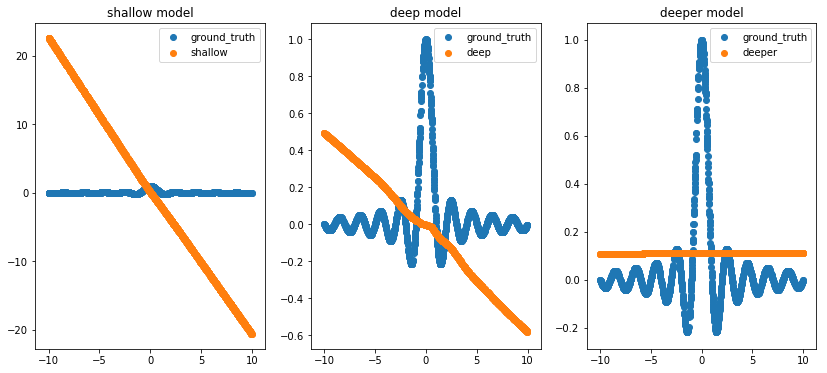

epoch:  101 | shallow loss: 0.03487 | deep loss: 0.0031 | deeper loss : 0.0026


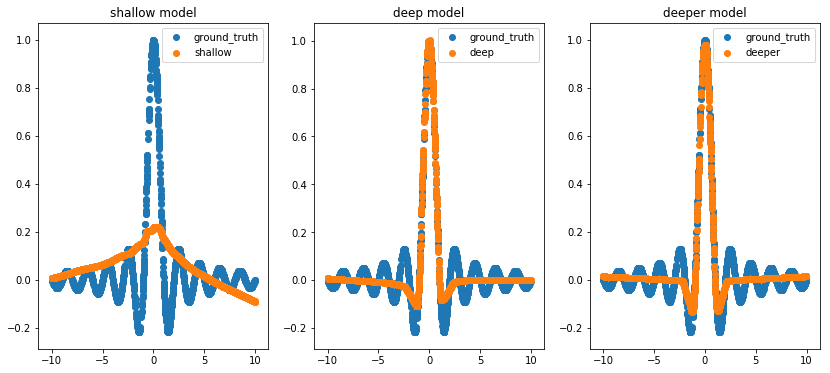

epoch:  201 | shallow loss: 0.02358 | deep loss: 0.0019 | deeper loss : 0.0018


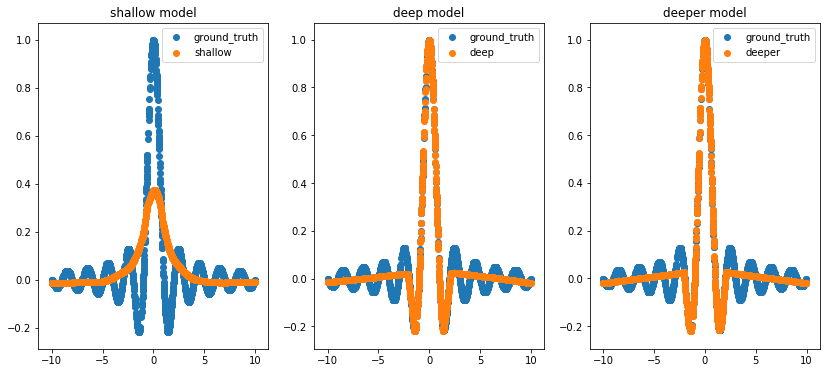

epoch:  301 | shallow loss: 0.01790 | deep loss: 0.0017 | deeper loss : 0.0018


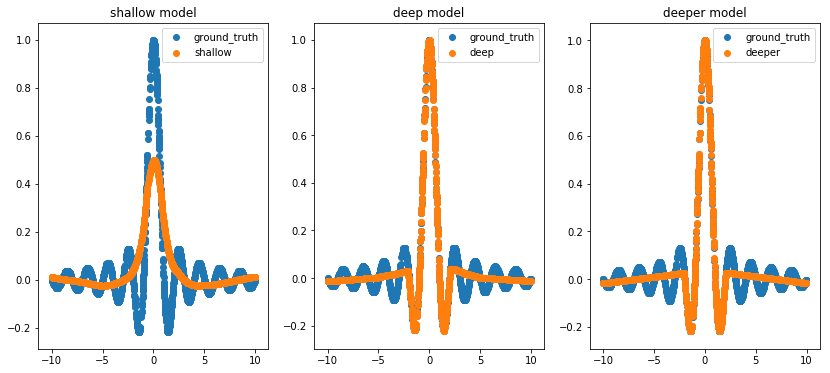

epoch:  401 | shallow loss: 0.01429 | deep loss: 0.0016 | deeper loss : 0.0018


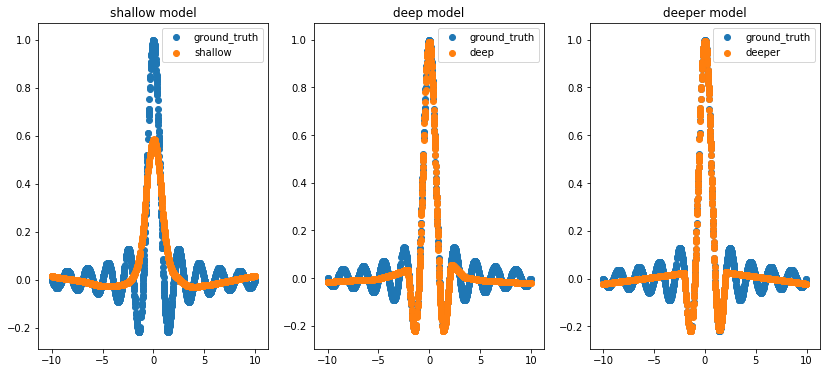

epoch:  501 | shallow loss: 0.01157 | deep loss: 0.0039 | deeper loss : 0.0018


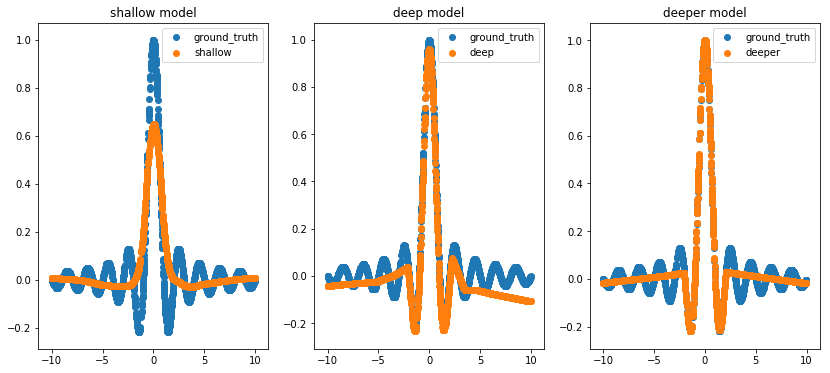

epoch:  601 | shallow loss: 0.00943 | deep loss: 0.0012 | deeper loss : 0.0018


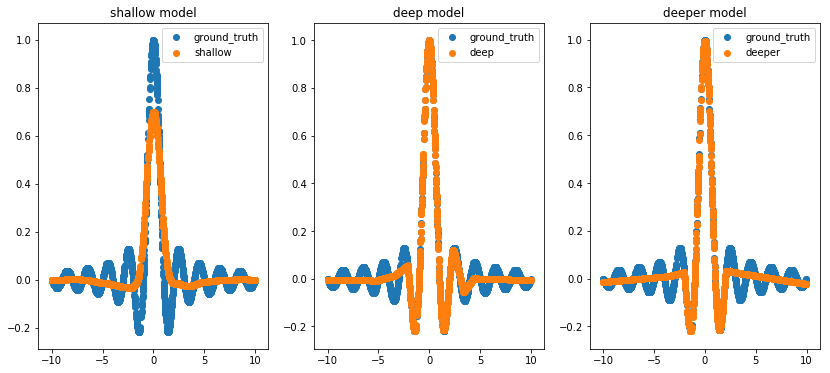

epoch:  701 | shallow loss: 0.00776 | deep loss: 0.0011 | deeper loss : 0.0018


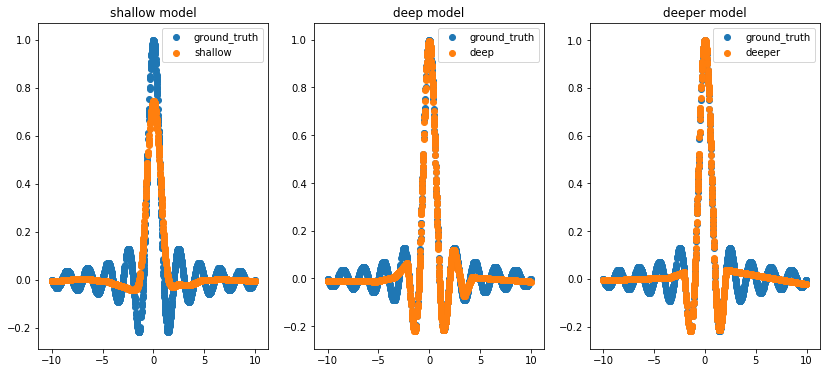

epoch:  801 | shallow loss: 0.00647 | deep loss: 0.0010 | deeper loss : 0.0018


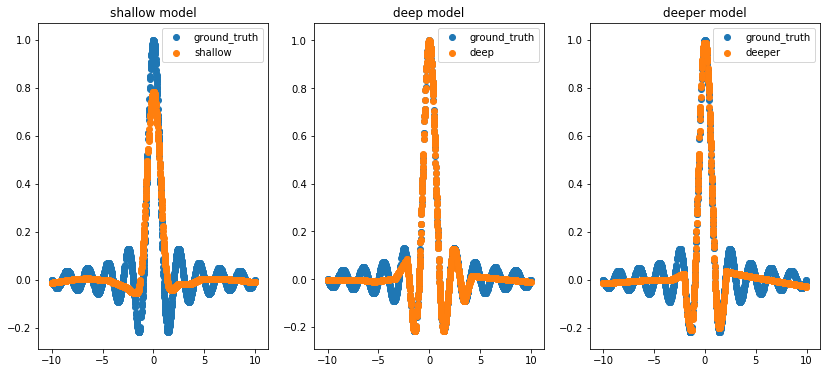

epoch:  901 | shallow loss: 0.00546 | deep loss: 0.0009 | deeper loss : 0.0014


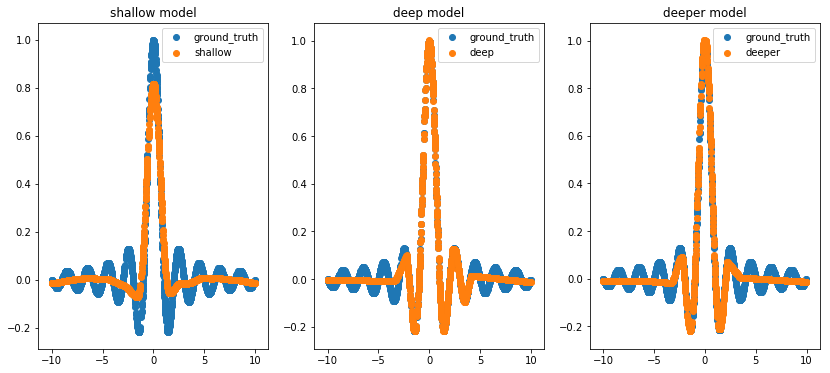

epoch: 1001 | shallow loss: 0.00466 | deep loss: 0.0009 | deeper loss : 0.0009


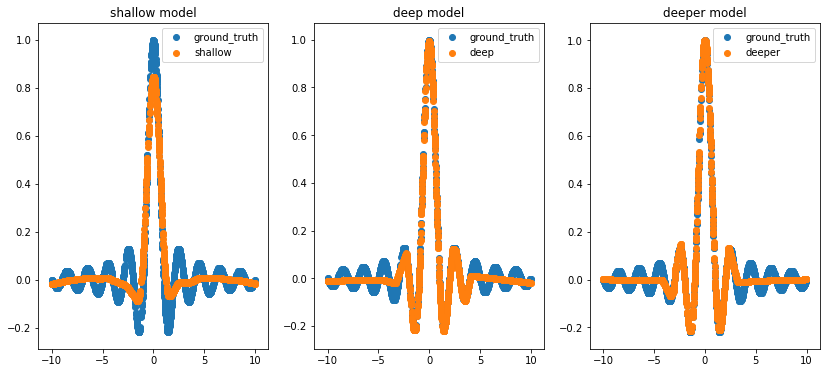

epoch: 1101 | shallow loss: 0.00402 | deep loss: 0.0008 | deeper loss : 0.0008


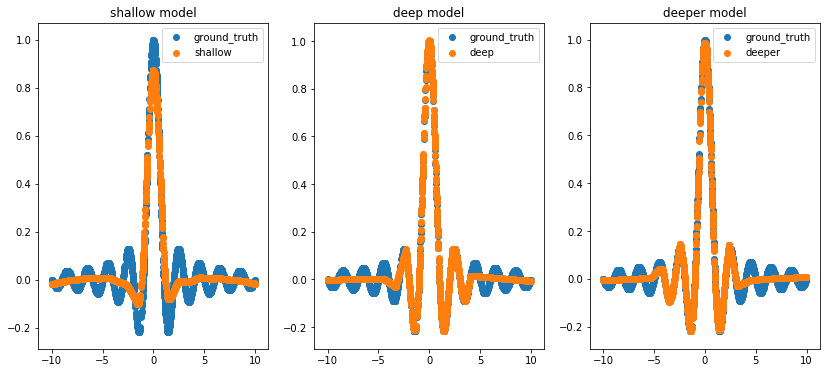

epoch: 1201 | shallow loss: 0.00351 | deep loss: 0.0007 | deeper loss : 0.0011


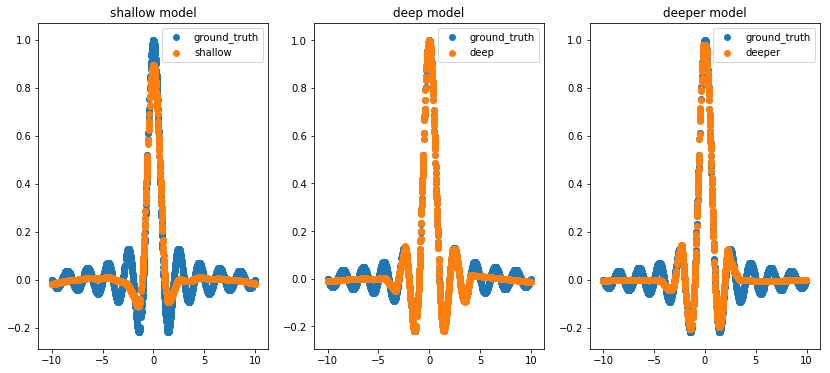

epoch: 1301 | shallow loss: 0.00310 | deep loss: 0.0008 | deeper loss : 0.0009


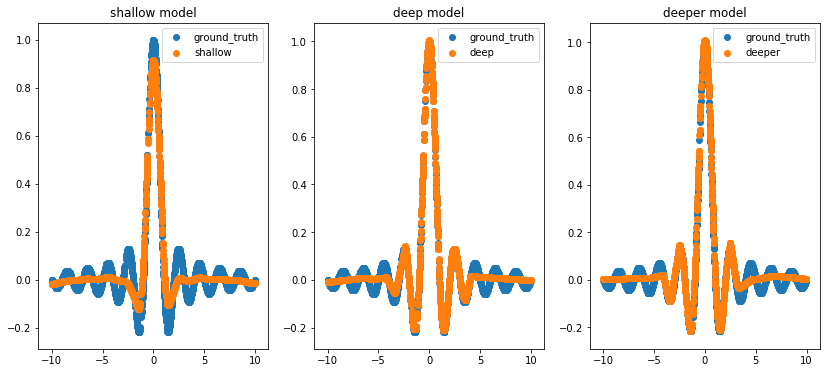

epoch: 1401 | shallow loss: 0.00277 | deep loss: 0.0007 | deeper loss : 0.0009


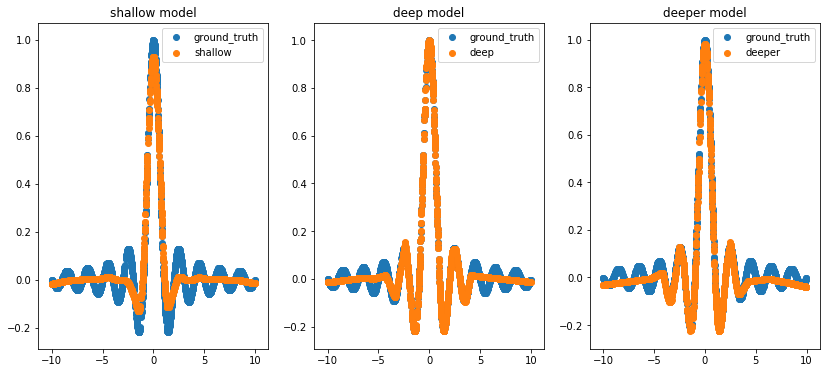

epoch: 1501 | shallow loss: 0.00251 | deep loss: 0.0006 | deeper loss : 0.0007


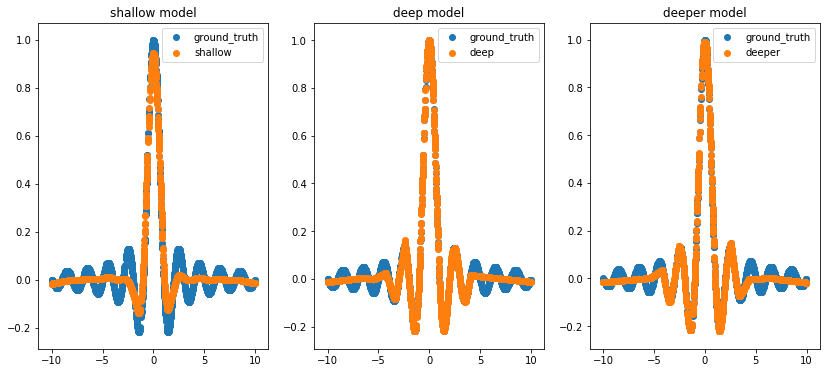

epoch: 1601 | shallow loss: 0.00229 | deep loss: 0.0007 | deeper loss : 0.0007


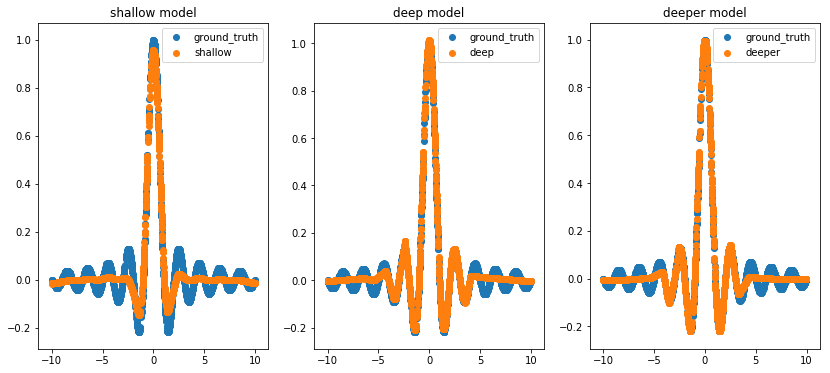

epoch: 1701 | shallow loss: 0.00211 | deep loss: 0.0006 | deeper loss : 0.0006


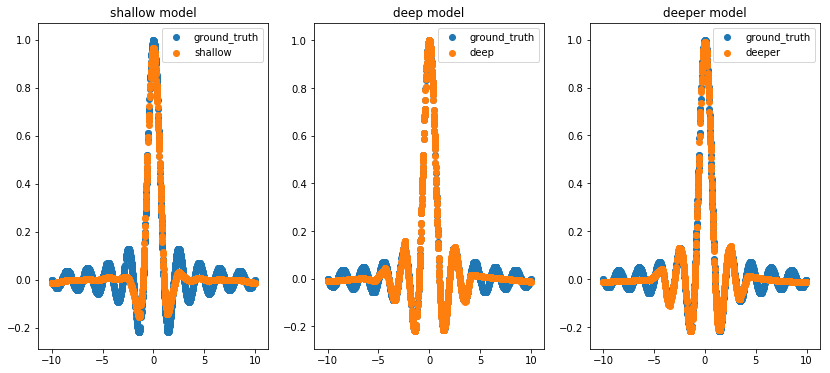

epoch: 1801 | shallow loss: 0.01563 | deep loss: 0.0006 | deeper loss : 0.0006


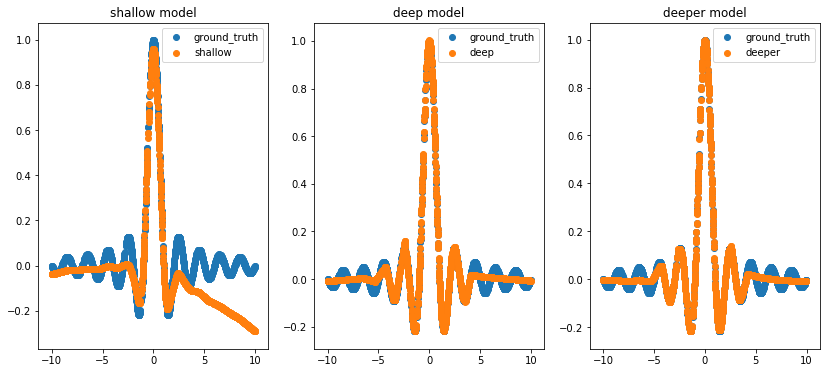

epoch: 1901 | shallow loss: 0.00220 | deep loss: 0.0005 | deeper loss : 0.0006


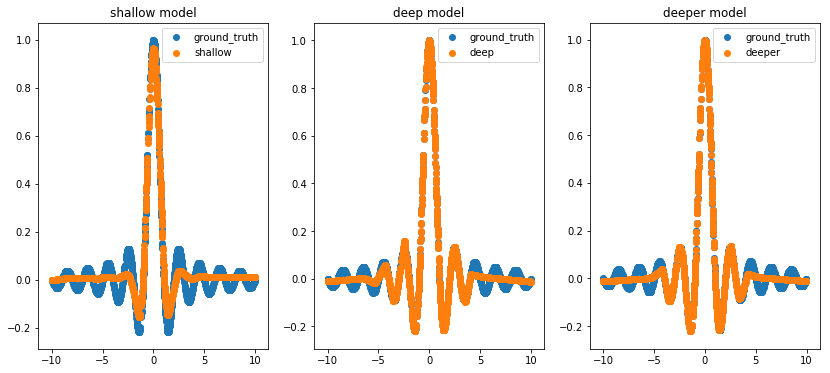

epoch: 2001 | shallow loss: 0.00195 | deep loss: 0.0006 | deeper loss : 0.0005


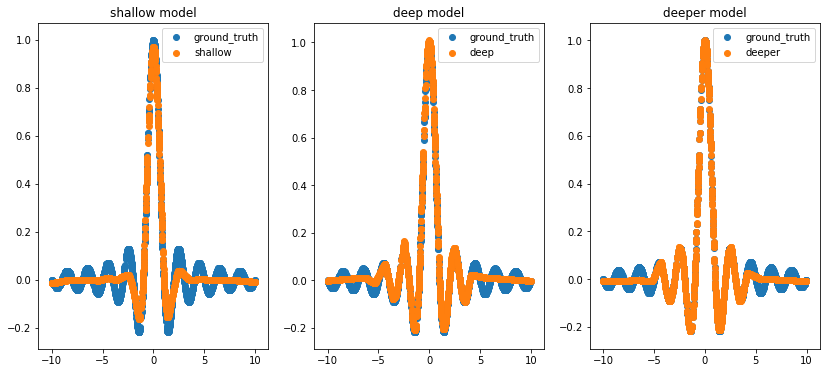

epoch: 2101 | shallow loss: 0.00182 | deep loss: 0.0005 | deeper loss : 0.0005


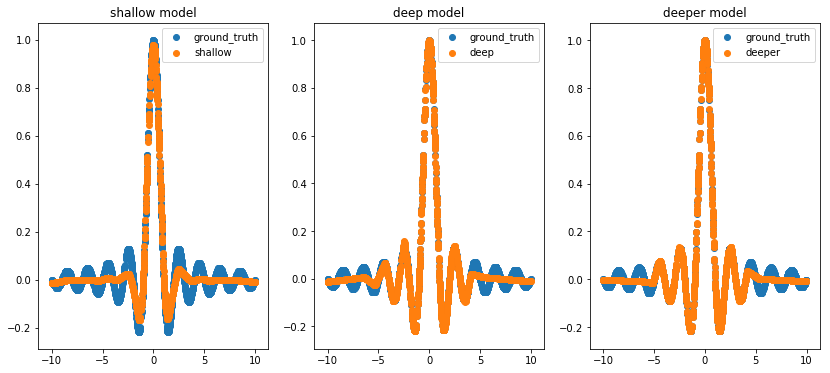

epoch: 2201 | shallow loss: 0.10191 | deep loss: 0.0012 | deeper loss : 0.0005


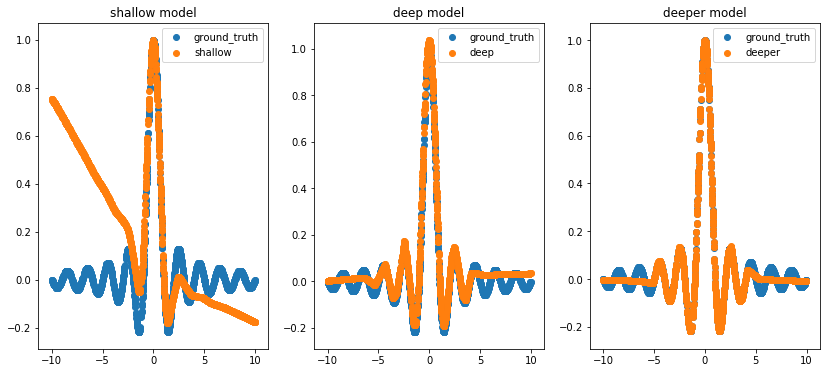

epoch: 2301 | shallow loss: 0.00190 | deep loss: 0.0005 | deeper loss : 0.0005


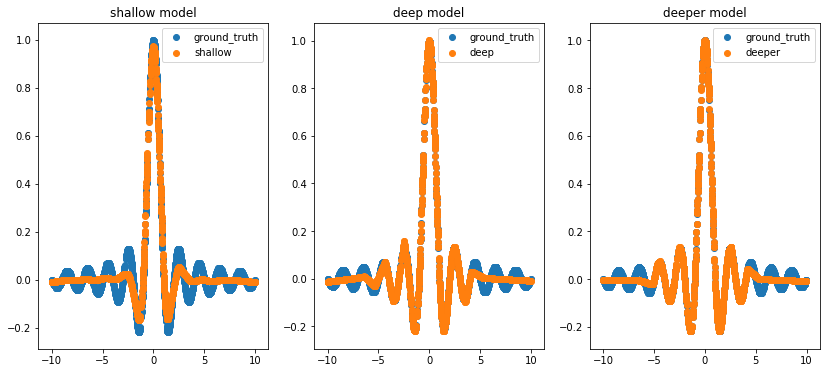

epoch: 2401 | shallow loss: 0.00362 | deep loss: 0.0005 | deeper loss : 0.0006


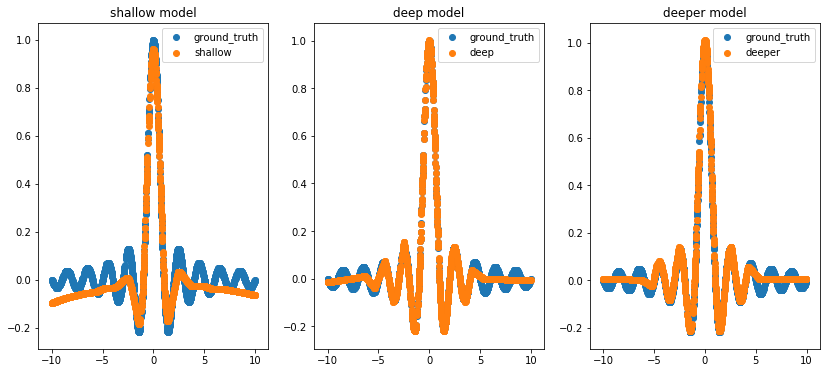

epoch: 2501 | shallow loss: 0.00179 | deep loss: 0.0005 | deeper loss : 0.0009


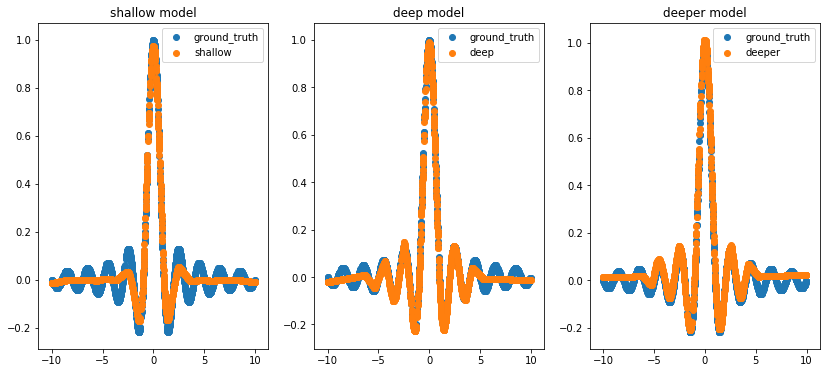

epoch: 2601 | shallow loss: 0.00168 | deep loss: 0.0004 | deeper loss : 0.0006


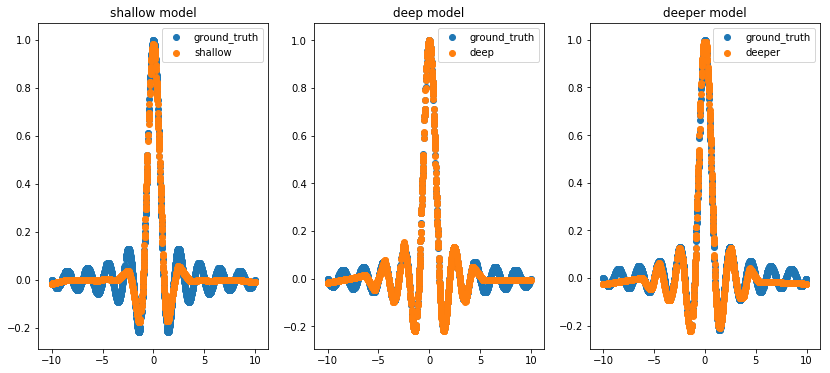

epoch: 2701 | shallow loss: 0.01442 | deep loss: 0.0008 | deeper loss : 0.0004


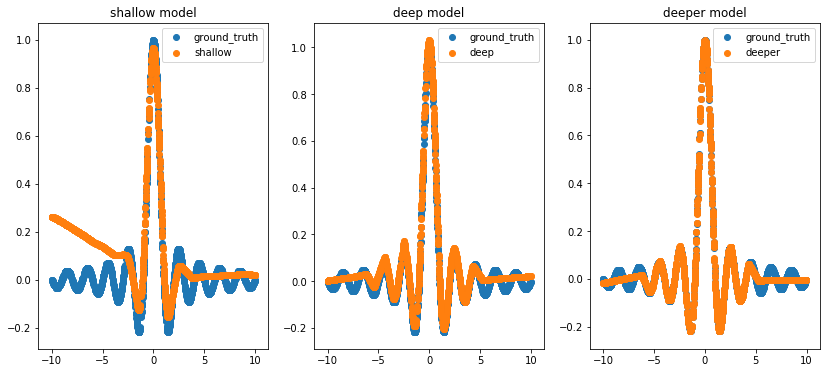

epoch: 2801 | shallow loss: 0.00197 | deep loss: 0.0004 | deeper loss : 0.0004


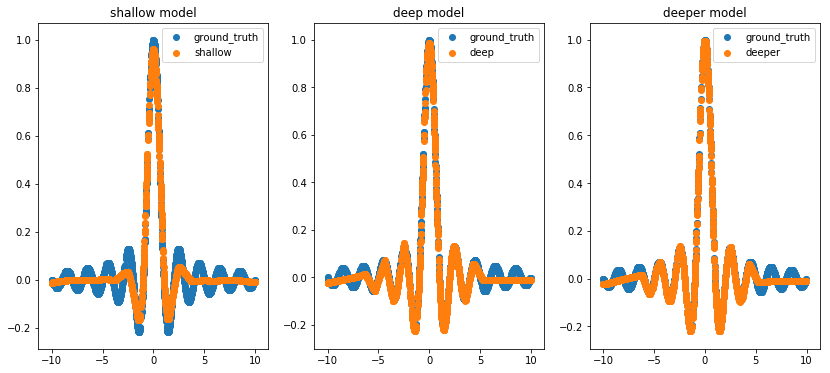

epoch: 2901 | shallow loss: 0.00182 | deep loss: 0.0005 | deeper loss : 0.0004


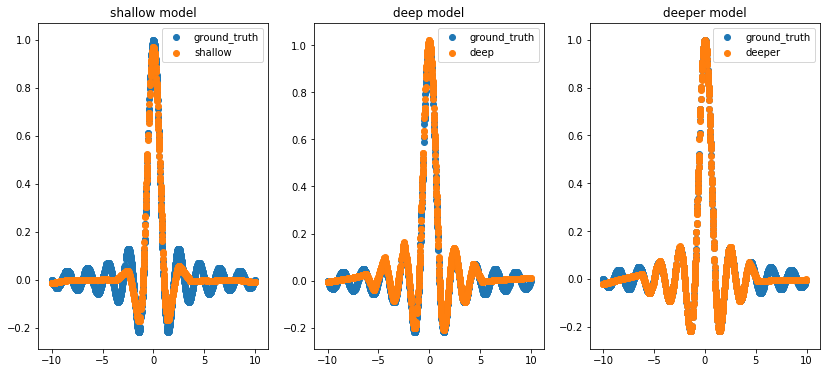

epoch: 3001 | shallow loss: 0.00170 | deep loss: 0.0004 | deeper loss : 0.0004


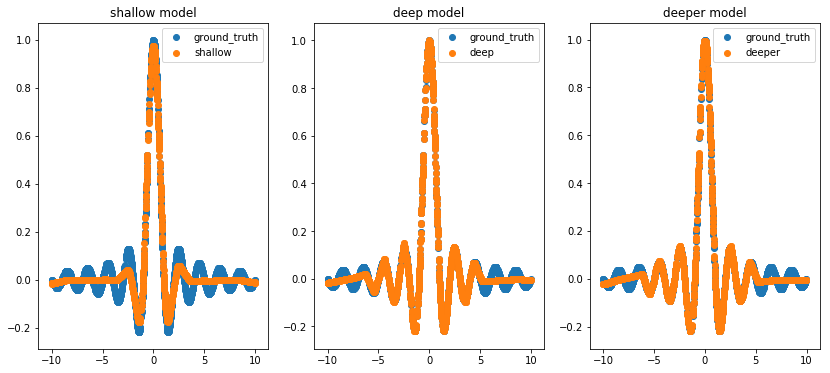

epoch: 3101 | shallow loss: 0.00161 | deep loss: 0.0004 | deeper loss : 0.0004


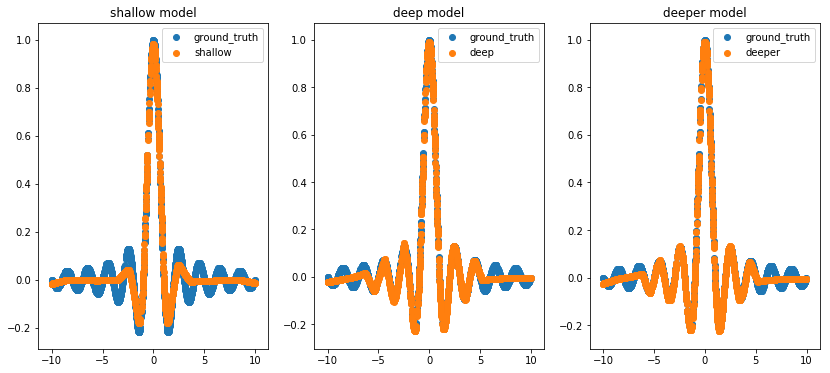

epoch: 3201 | shallow loss: 0.00308 | deep loss: 0.0004 | deeper loss : 0.0004


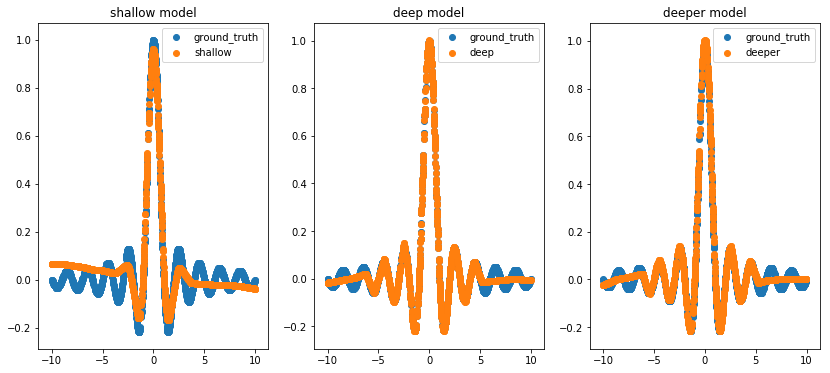

epoch: 3301 | shallow loss: 0.00180 | deep loss: 0.0004 | deeper loss : 0.0004


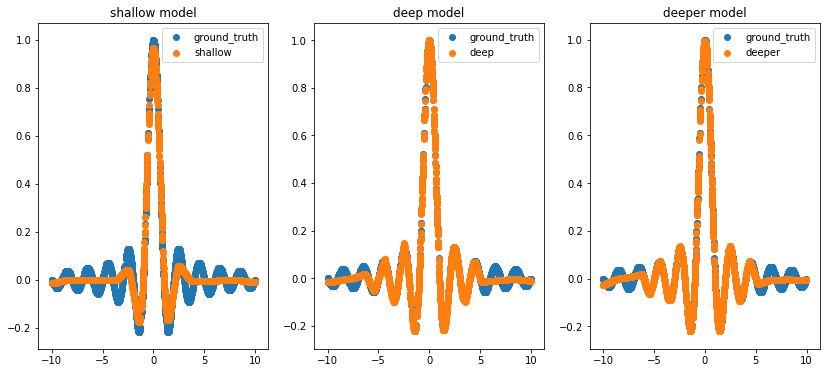

epoch: 3401 | shallow loss: 0.00168 | deep loss: 0.0004 | deeper loss : 0.0004


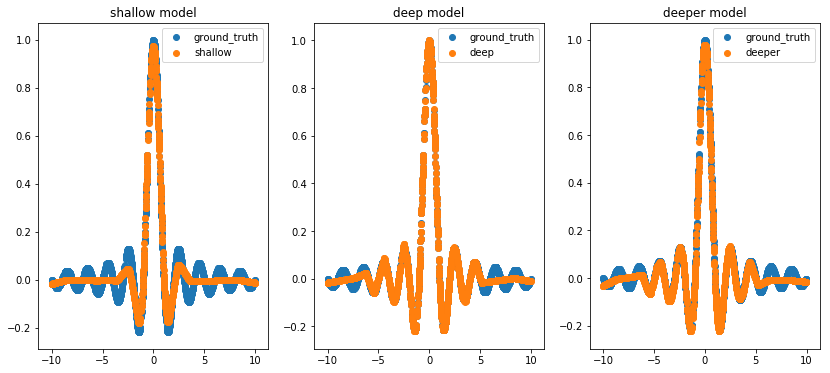

epoch: 3501 | shallow loss: 1.38268 | deep loss: 0.0003 | deeper loss : 0.0003


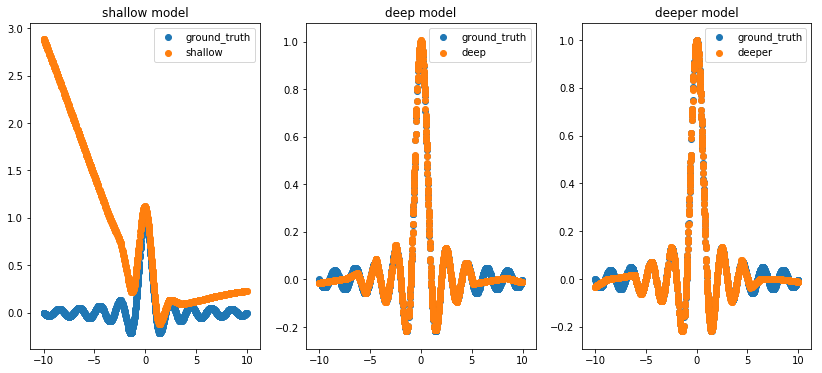

epoch: 3601 | shallow loss: 0.00185 | deep loss: 0.0003 | deeper loss : 0.0003


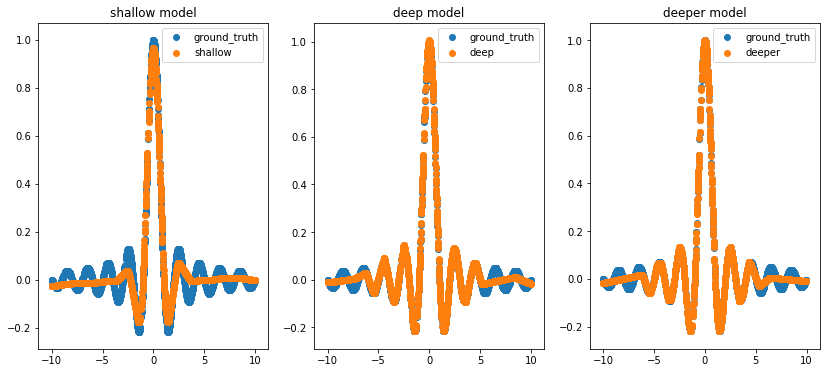

epoch: 3701 | shallow loss: 0.00917 | deep loss: 0.0003 | deeper loss : 0.0003


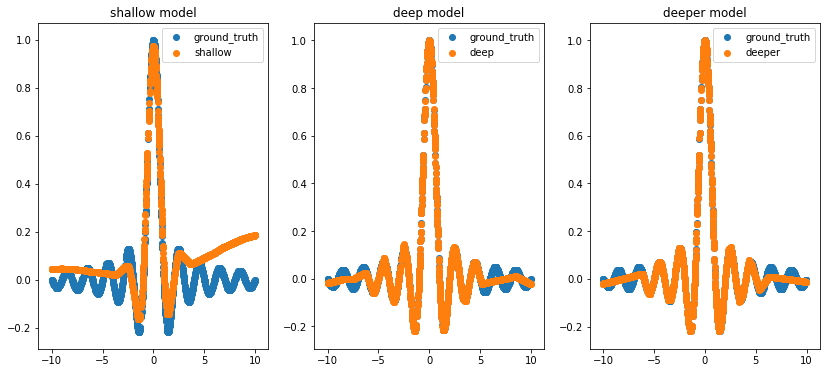

epoch: 3801 | shallow loss: 0.00168 | deep loss: 0.0003 | deeper loss : 0.0003


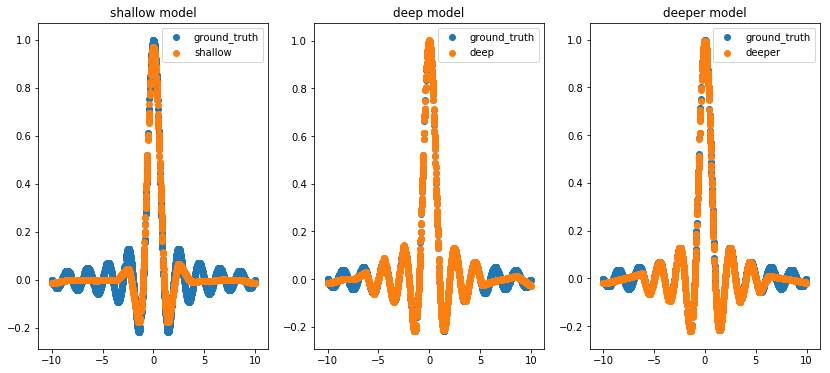

epoch: 3901 | shallow loss: 0.00158 | deep loss: 0.0004 | deeper loss : 0.0003


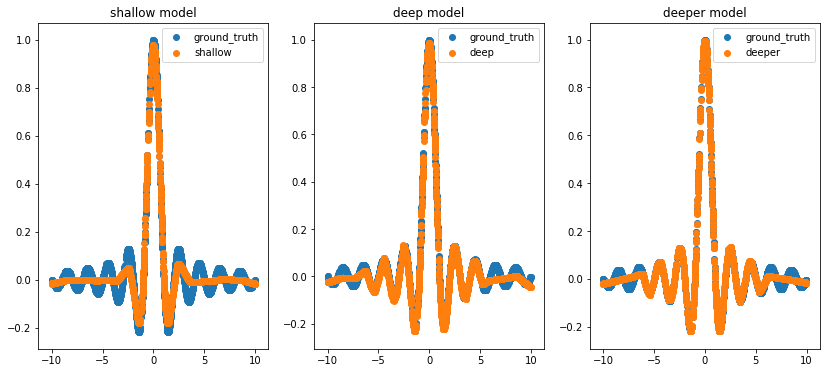

epoch: 4001 | shallow loss: 0.24135 | deep loss: 0.0003 | deeper loss : 0.0003


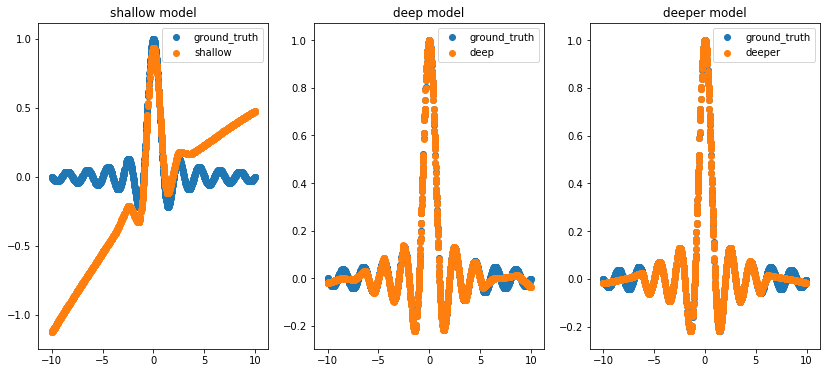

epoch: 4101 | shallow loss: 0.00183 | deep loss: 0.0002 | deeper loss : 0.0003


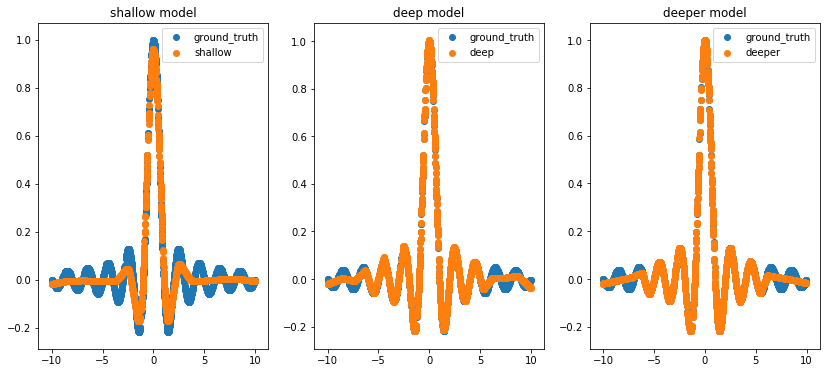

epoch: 4201 | shallow loss: 0.00168 | deep loss: 0.0002 | deeper loss : 0.0003


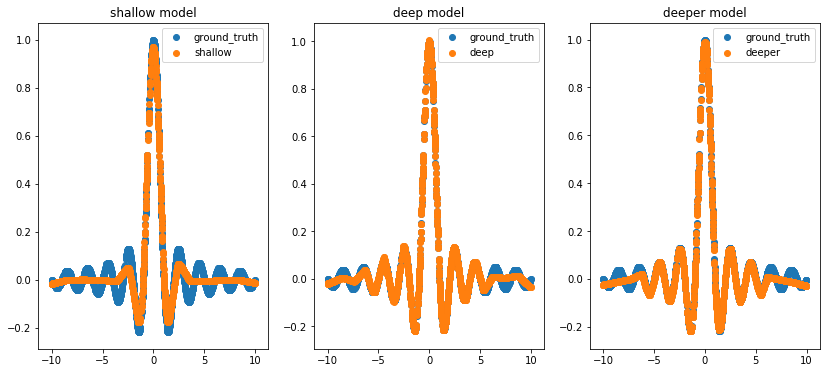

epoch: 4301 | shallow loss: 0.00157 | deep loss: 0.0002 | deeper loss : 0.0003


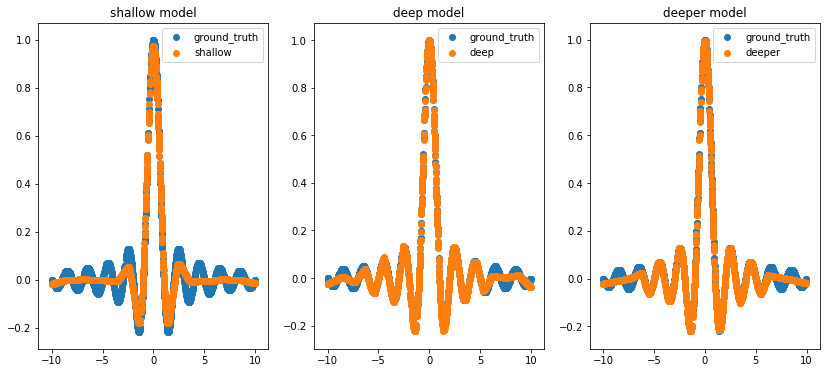

epoch: 4401 | shallow loss: 1.05476 | deep loss: 0.0005 | deeper loss : 0.0004


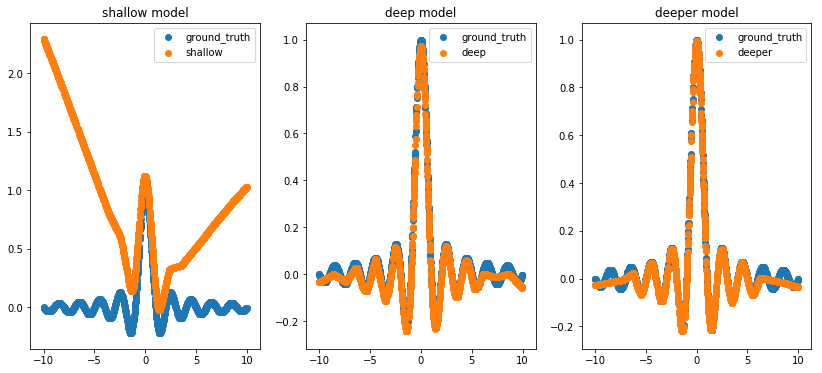

epoch: 4501 | shallow loss: 0.00177 | deep loss: 0.0002 | deeper loss : 0.0003


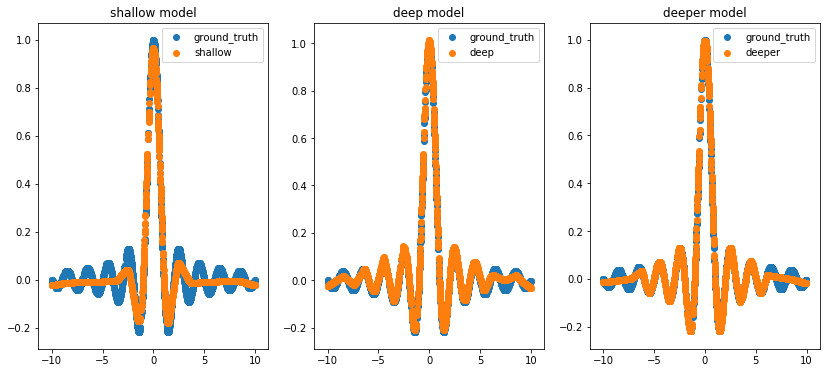

epoch: 4601 | shallow loss: 0.00528 | deep loss: 0.0001 | deeper loss : 0.0003


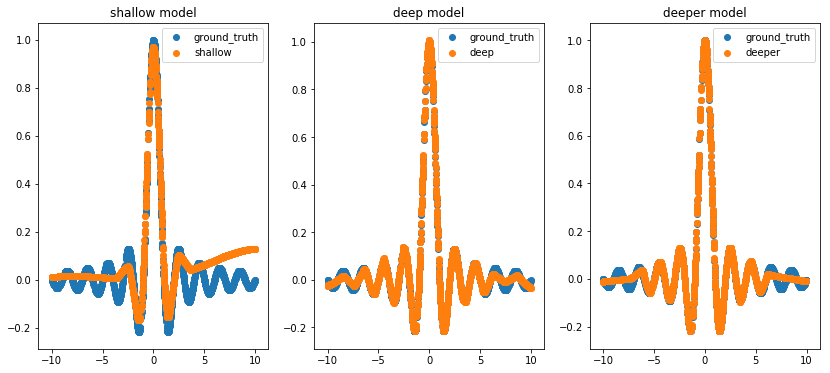

epoch: 4701 | shallow loss: 0.00161 | deep loss: 0.0001 | deeper loss : 0.0002


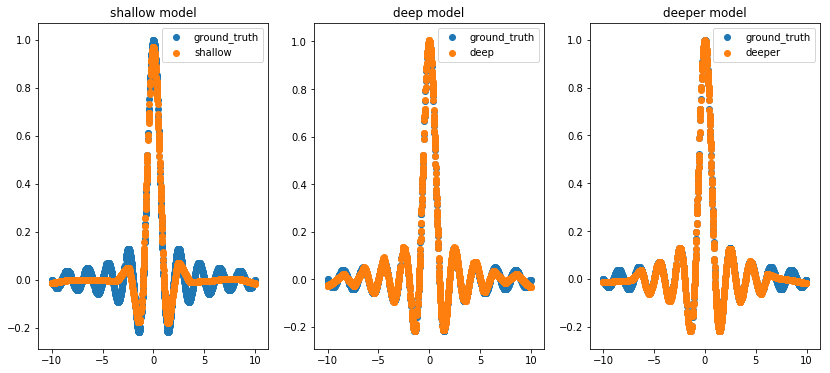

epoch: 4801 | shallow loss: 0.00151 | deep loss: 0.0003 | deeper loss : 0.0002


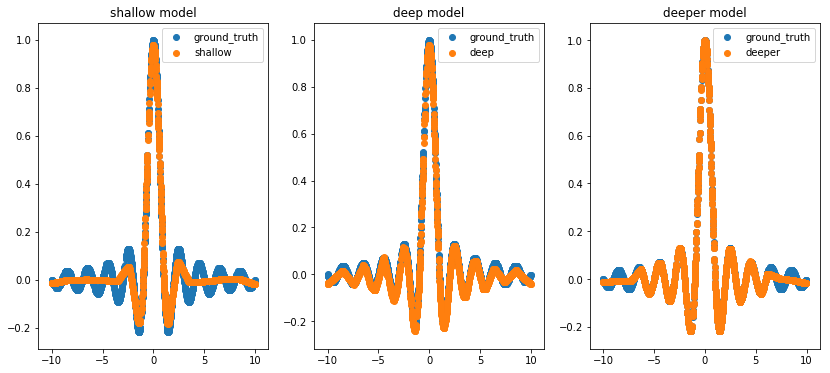

epoch: 4901 | shallow loss: 0.03021 | deep loss: 0.0001 | deeper loss : 0.0002


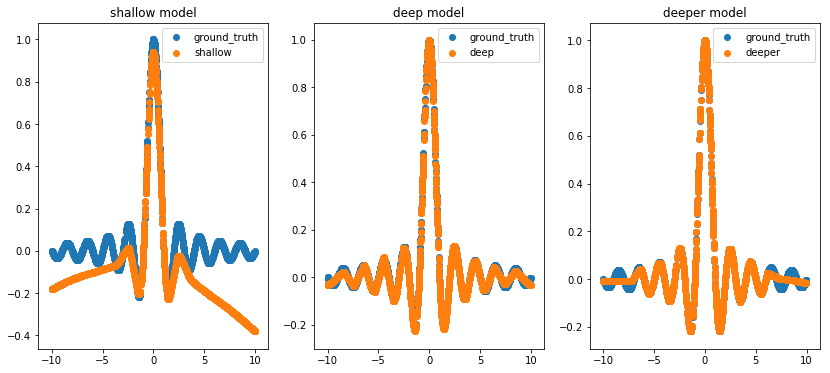

epoch: 5001 | shallow loss: 0.00161 | deep loss: 0.0001 | deeper loss : 0.0003


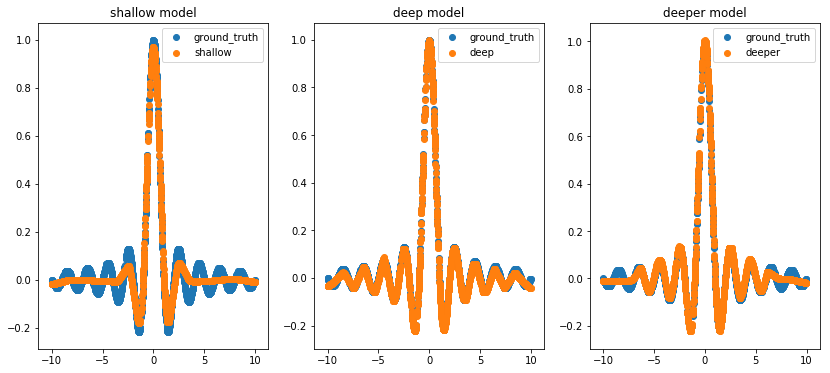

epoch: 5101 | shallow loss: 0.00233 | deep loss: 0.0000 | deeper loss : 0.0004


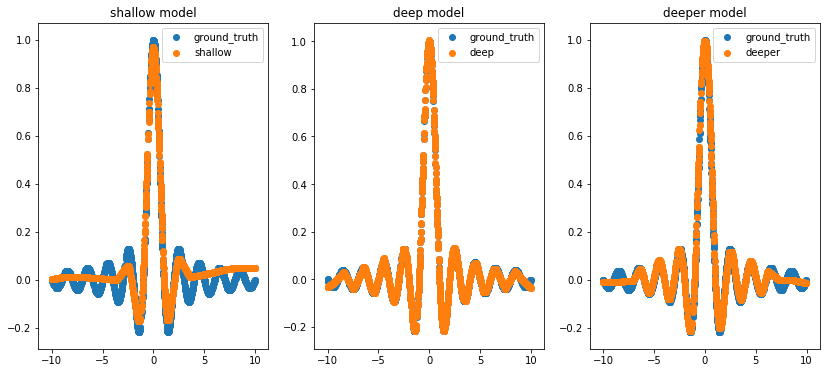

epoch: 5201 | shallow loss: 0.00153 | deep loss: 0.0000 | deeper loss : 0.0003


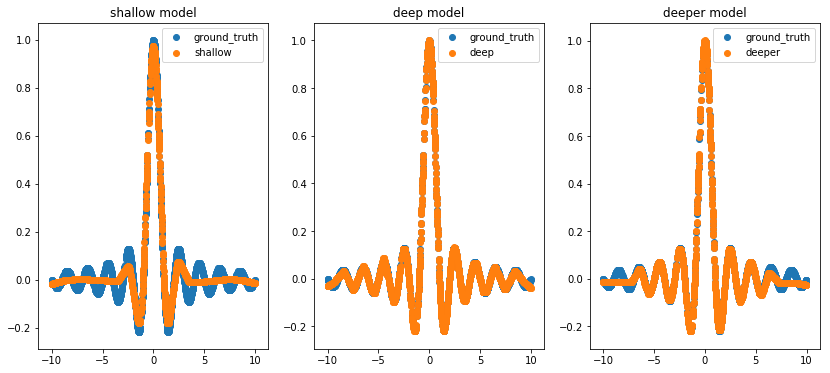

epoch: 5301 | shallow loss: 0.00144 | deep loss: 0.0000 | deeper loss : 0.0002


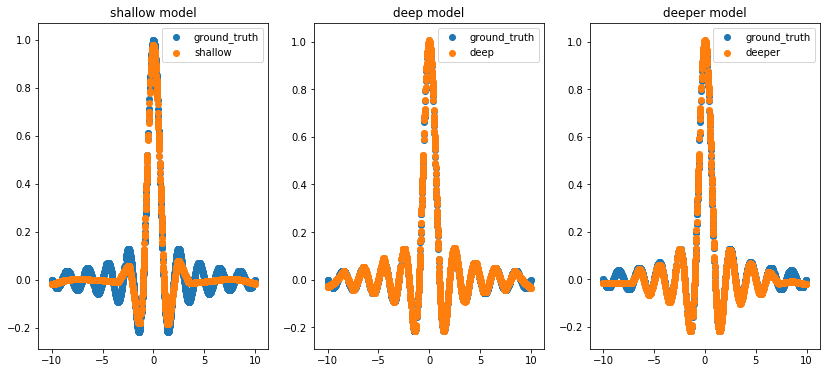

epoch: 5401 | shallow loss: 0.03379 | deep loss: 0.0001 | deeper loss : 0.0002


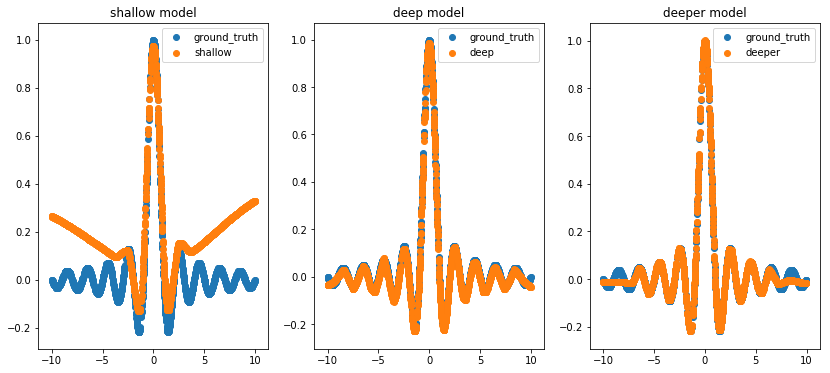

epoch: 5501 | shallow loss: 0.00172 | deep loss: 0.0000 | deeper loss : 0.0002


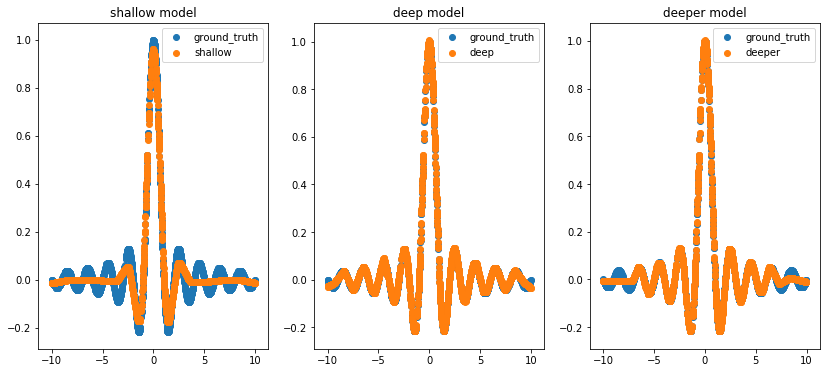

epoch: 5601 | shallow loss: 0.00158 | deep loss: 0.0000 | deeper loss : 0.0002


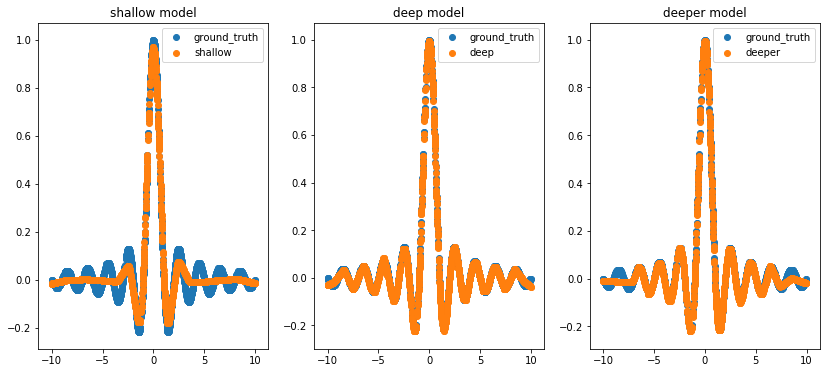

epoch: 5701 | shallow loss: 0.00148 | deep loss: 0.0000 | deeper loss : 0.0002


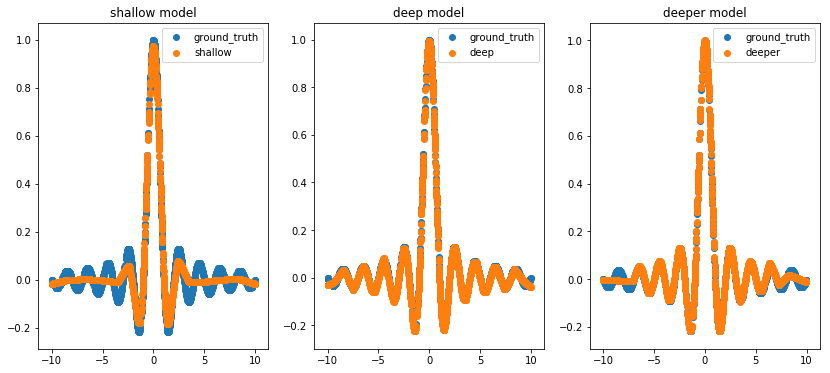

epoch: 5801 | shallow loss: 0.00139 | deep loss: 0.0000 | deeper loss : 0.0002


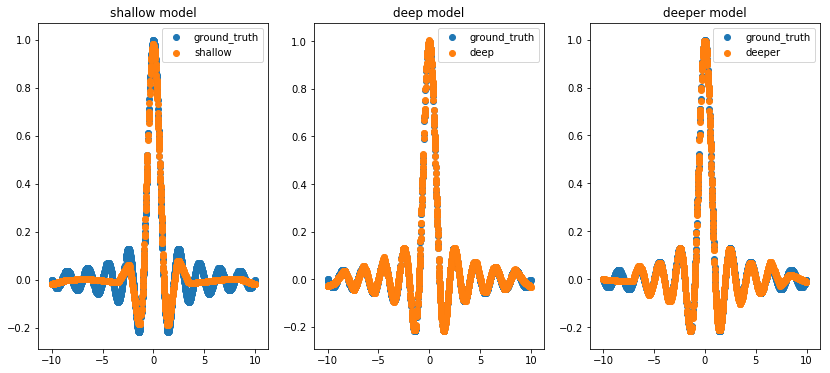

epoch: 5901 | shallow loss: 0.03405 | deep loss: 0.0000 | deeper loss : 0.0002


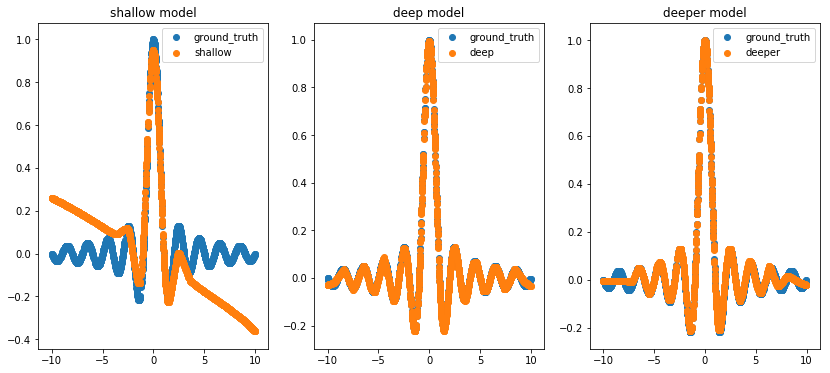

epoch: 6001 | shallow loss: 0.00164 | deep loss: 0.0001 | deeper loss : 0.0002


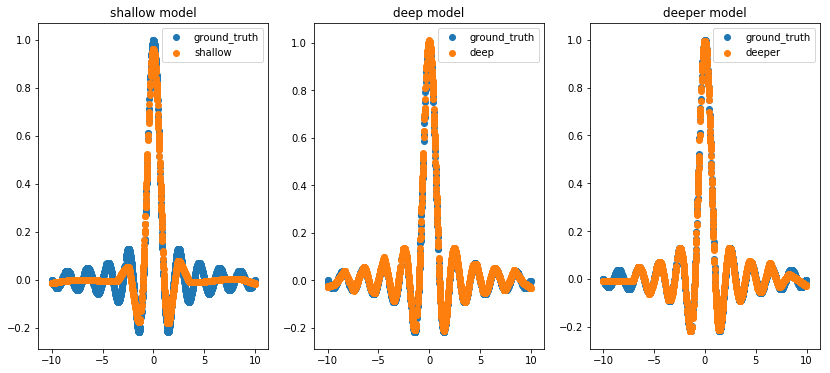

epoch: 6101 | shallow loss: 0.00151 | deep loss: 0.0001 | deeper loss : 0.0002


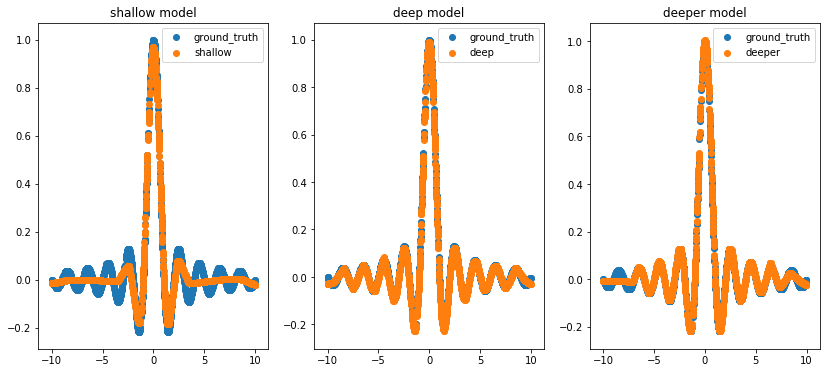

epoch: 6201 | shallow loss: 0.00141 | deep loss: 0.0000 | deeper loss : 0.0002


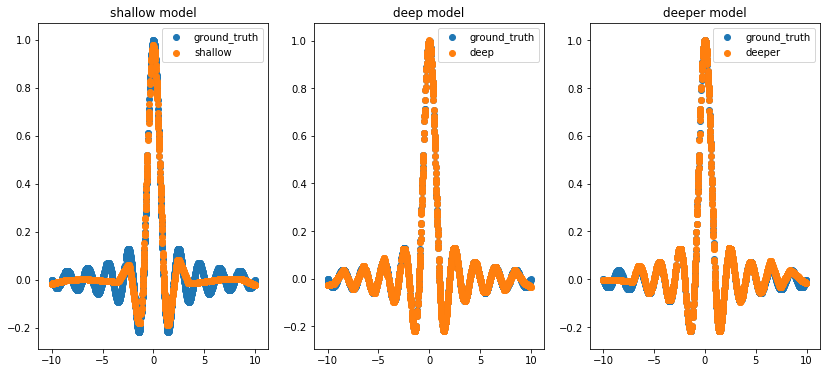

epoch: 6301 | shallow loss: 0.00174 | deep loss: 0.0000 | deeper loss : 0.0002


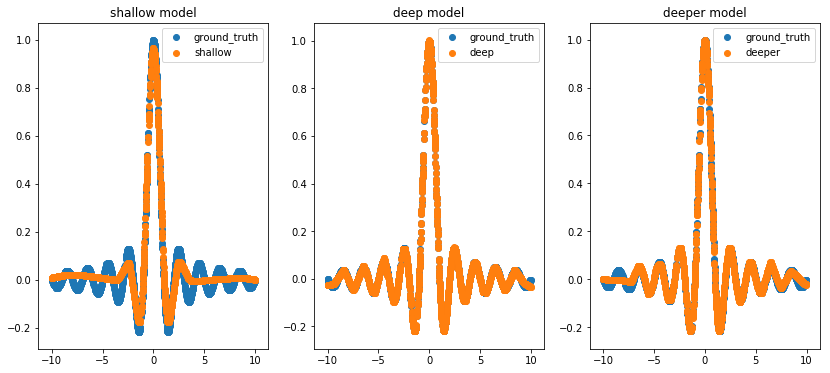

epoch: 6401 | shallow loss: 0.00149 | deep loss: 0.0000 | deeper loss : 0.0001


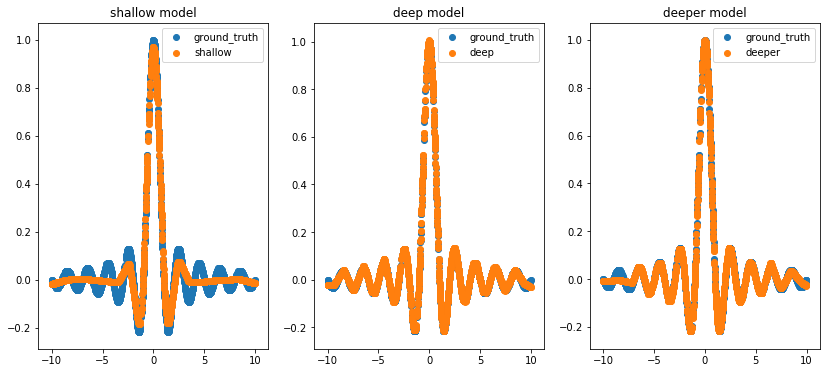

epoch: 6501 | shallow loss: 0.00345 | deep loss: 0.0000 | deeper loss : 0.0001


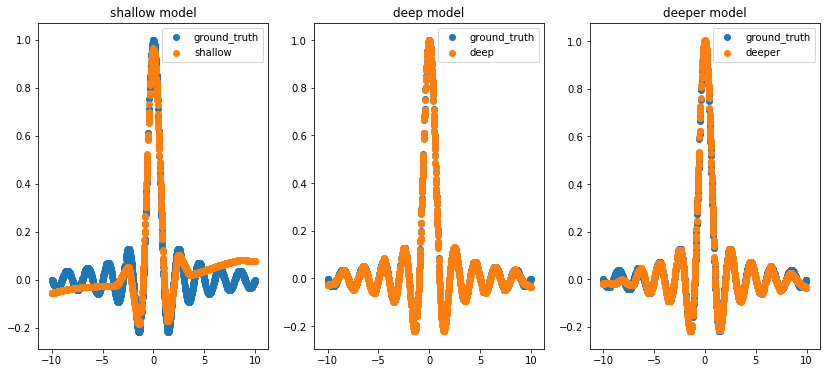

epoch: 6601 | shallow loss: 0.00148 | deep loss: 0.0001 | deeper loss : 0.0000


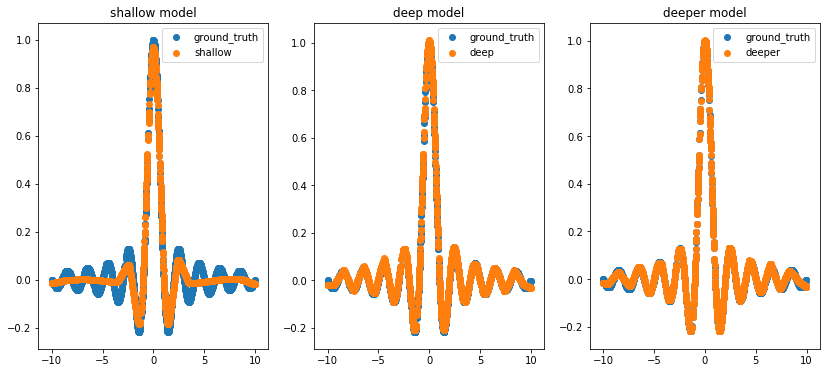

epoch: 6701 | shallow loss: 0.00138 | deep loss: 0.0000 | deeper loss : 0.0001


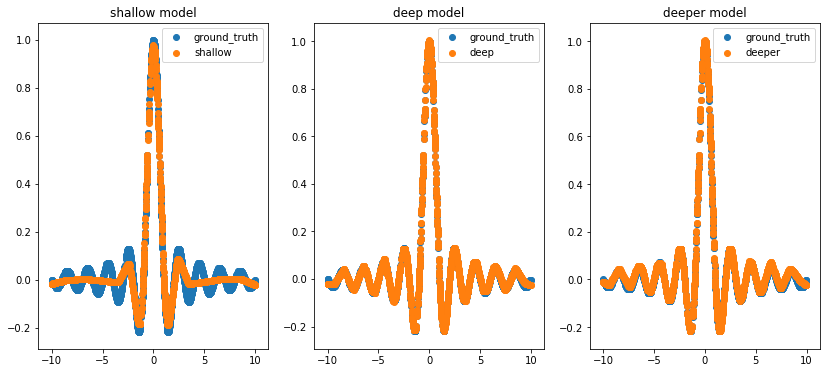

epoch: 6801 | shallow loss: 0.00137 | deep loss: 0.0000 | deeper loss : 0.0001


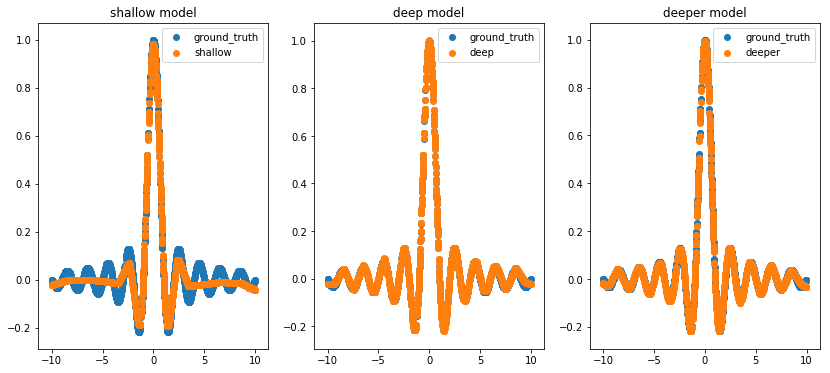

epoch: 6901 | shallow loss: 0.00169 | deep loss: 0.0000 | deeper loss : 0.0000


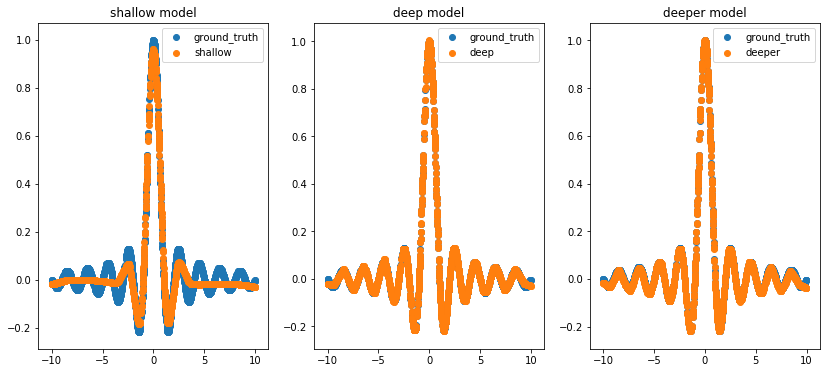

epoch: 7001 | shallow loss: 0.00147 | deep loss: 0.0000 | deeper loss : 0.0000


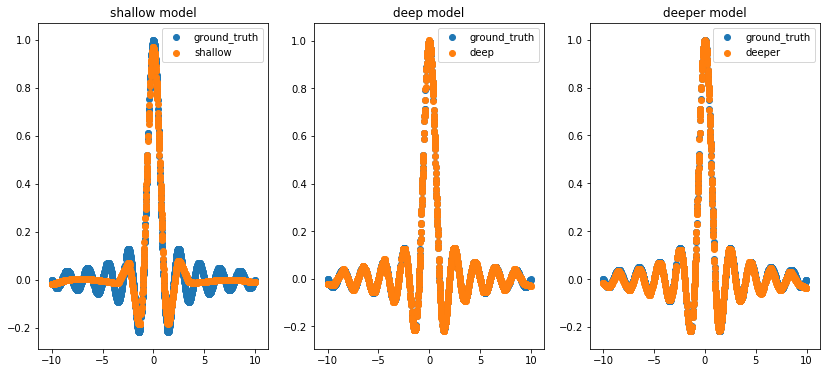

epoch: 7101 | shallow loss: 0.02639 | deep loss: 0.0000 | deeper loss : 0.0001


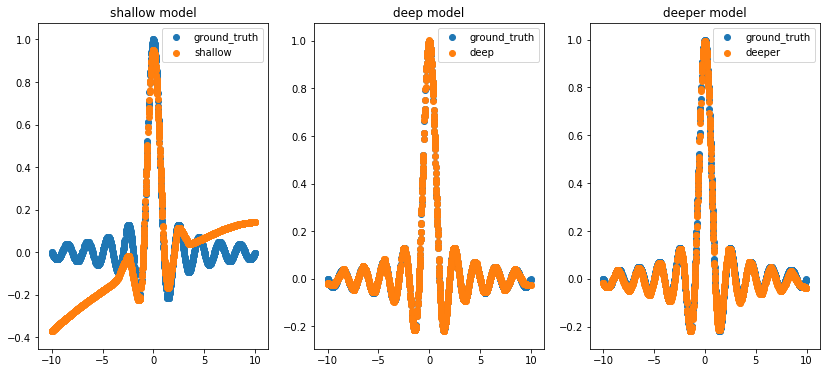

epoch: 7201 | shallow loss: 0.00148 | deep loss: 0.0000 | deeper loss : 0.0000


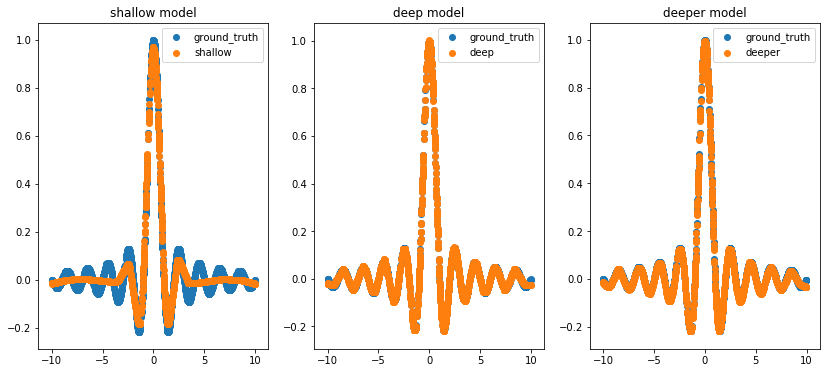

epoch: 7301 | shallow loss: 0.00138 | deep loss: 0.0000 | deeper loss : 0.0000


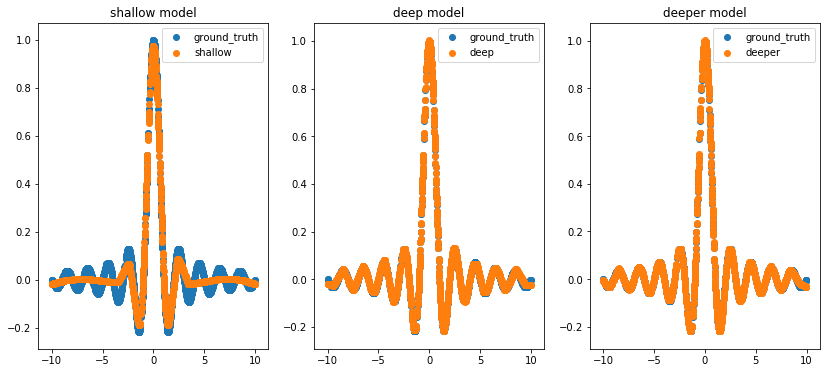

epoch: 7401 | shallow loss: 0.08965 | deep loss: 0.0000 | deeper loss : 0.0000


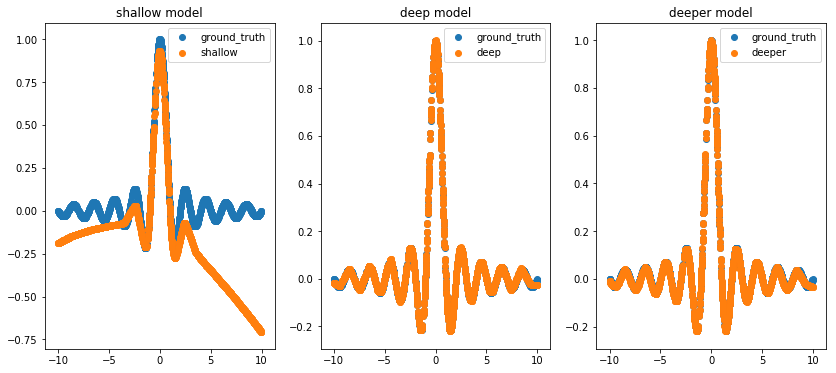

epoch: 7501 | shallow loss: 0.00208 | deep loss: 0.0001 | deeper loss : 0.0000


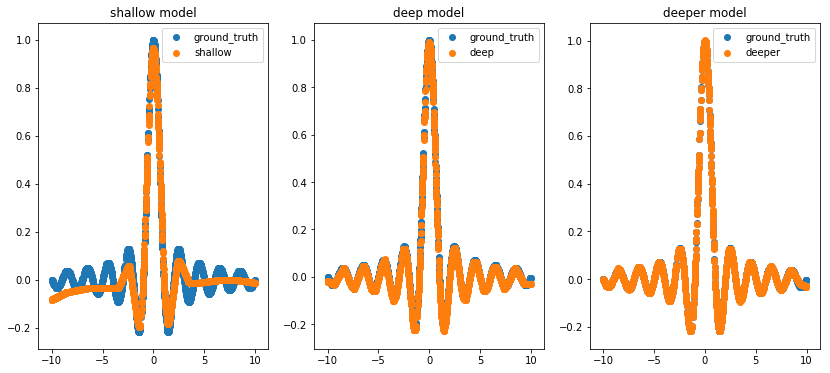

epoch: 7601 | shallow loss: 0.00147 | deep loss: 0.0000 | deeper loss : 0.0000


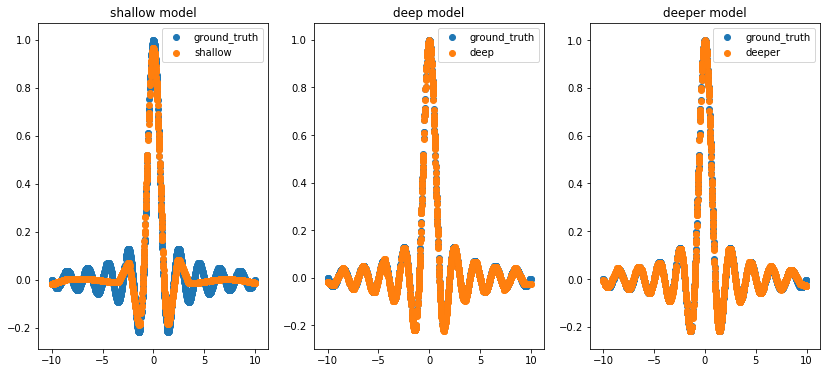

epoch: 7701 | shallow loss: 0.00136 | deep loss: 0.0000 | deeper loss : 0.0000


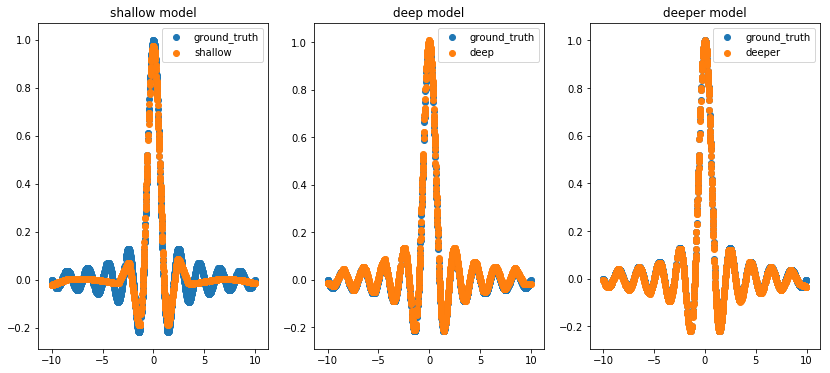

epoch: 7801 | shallow loss: 0.09312 | deep loss: 0.0000 | deeper loss : 0.0000


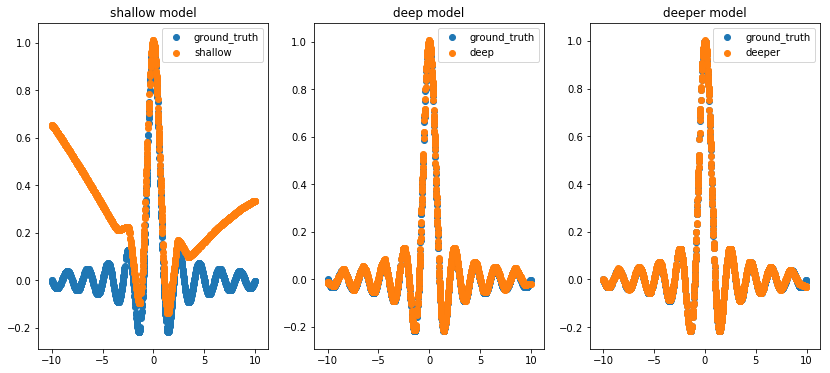

epoch: 7901 | shallow loss: 0.00152 | deep loss: 0.0000 | deeper loss : 0.0000


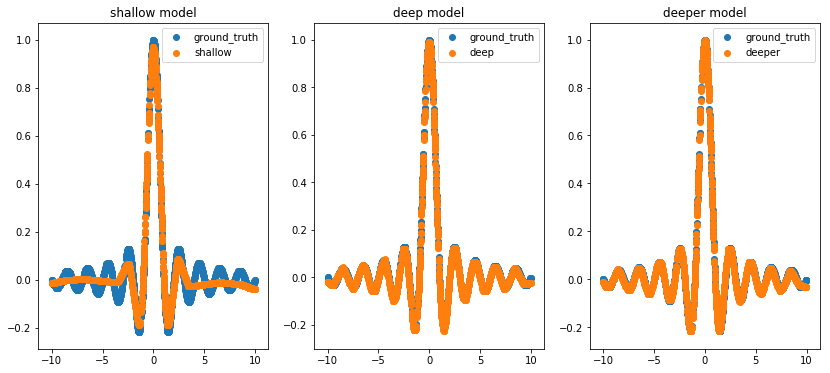

epoch: 8001 | shallow loss: 0.00146 | deep loss: 0.0000 | deeper loss : 0.0000


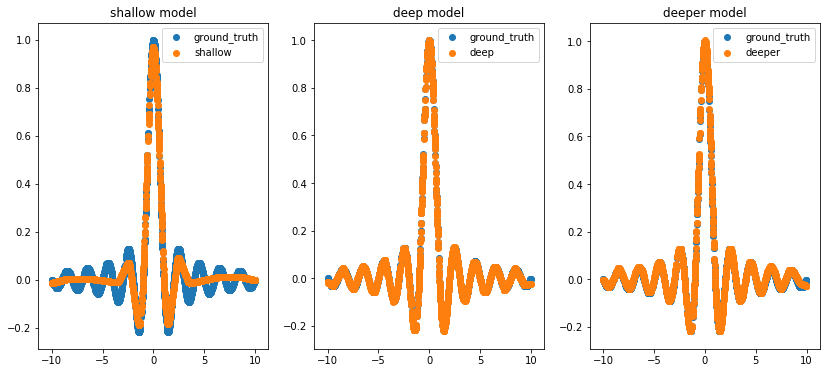

epoch: 8101 | shallow loss: 0.00133 | deep loss: 0.0000 | deeper loss : 0.0000


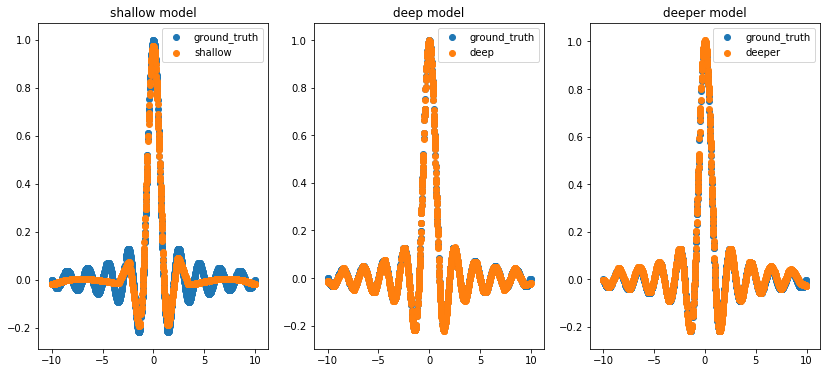

epoch: 8201 | shallow loss: 0.01594 | deep loss: 0.0000 | deeper loss : 0.0000


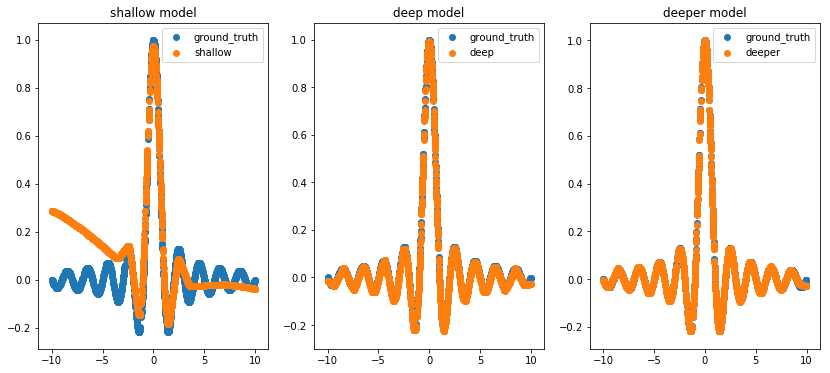

epoch: 8301 | shallow loss: 0.00145 | deep loss: 0.0000 | deeper loss : 0.0000


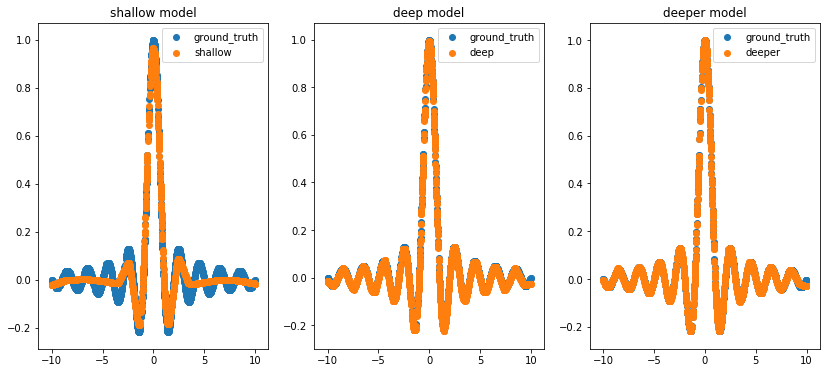

epoch: 8401 | shallow loss: 0.00134 | deep loss: 0.0000 | deeper loss : 0.0000


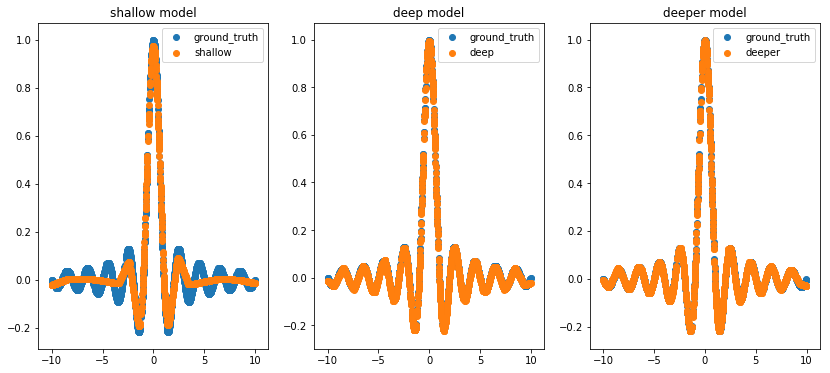

epoch: 8501 | shallow loss: 0.00127 | deep loss: 0.0000 | deeper loss : 0.0000


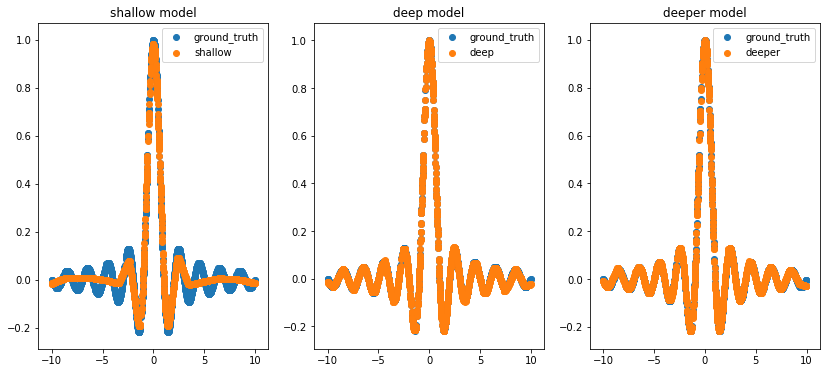

epoch: 8601 | shallow loss: 0.00170 | deep loss: 0.0000 | deeper loss : 0.0000


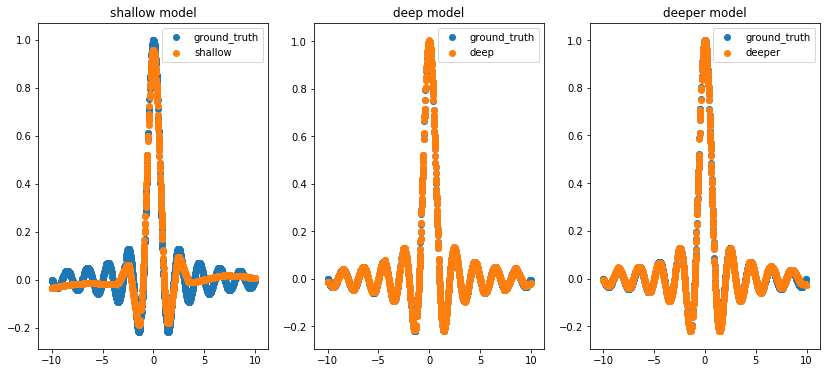

epoch: 8701 | shallow loss: 0.00141 | deep loss: 0.0000 | deeper loss : 0.0000


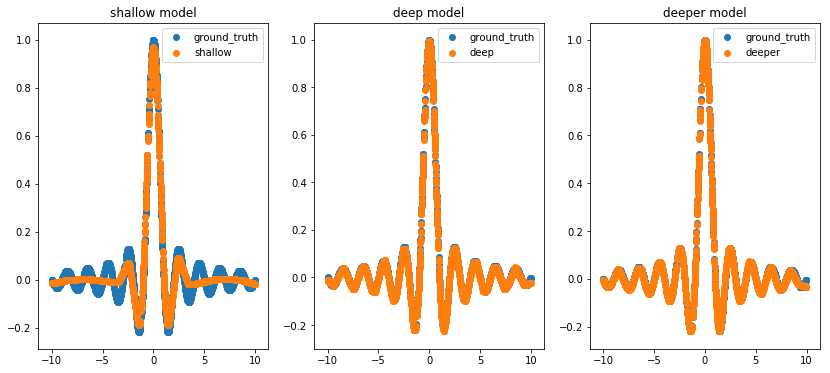

epoch: 8801 | shallow loss: 0.02846 | deep loss: 0.0001 | deeper loss : 0.0000


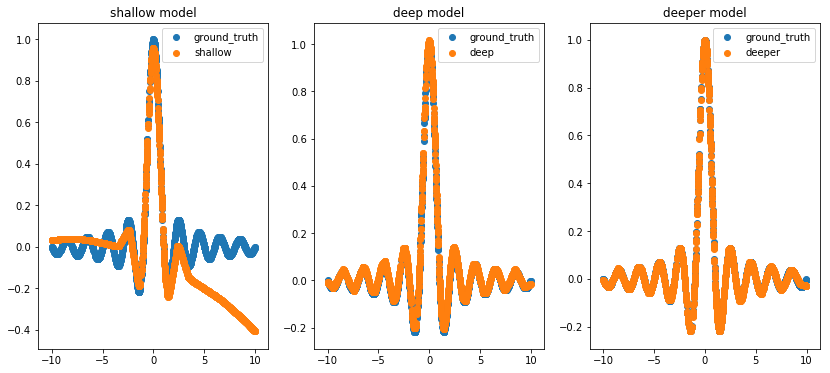

epoch: 8901 | shallow loss: 0.00141 | deep loss: 0.0001 | deeper loss : 0.0000


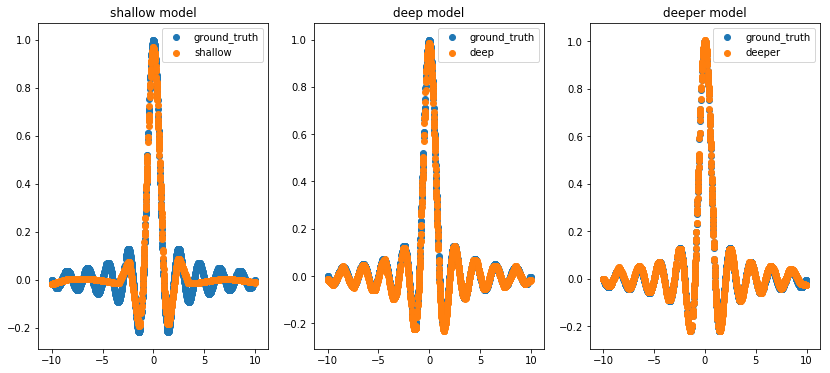

epoch: 9001 | shallow loss: 0.00131 | deep loss: 0.0000 | deeper loss : 0.0000


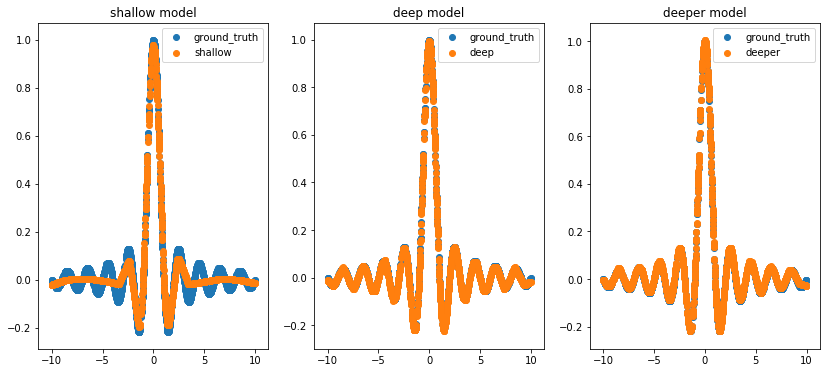

epoch: 9101 | shallow loss: 0.00284 | deep loss: 0.0000 | deeper loss : 0.0001


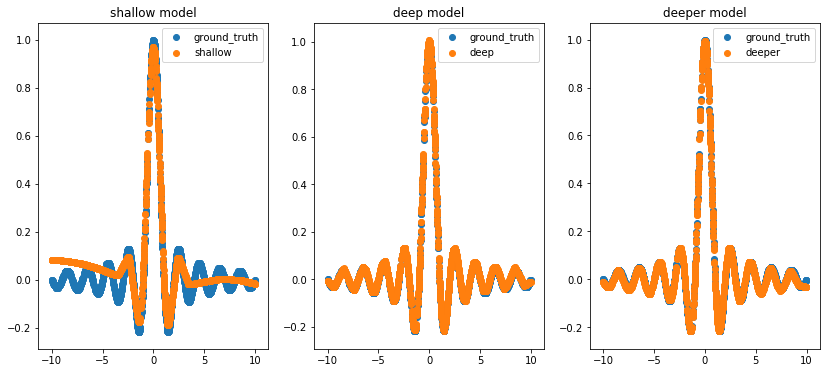

epoch: 9201 | shallow loss: 0.01773 | deep loss: 0.0000 | deeper loss : 0.0000


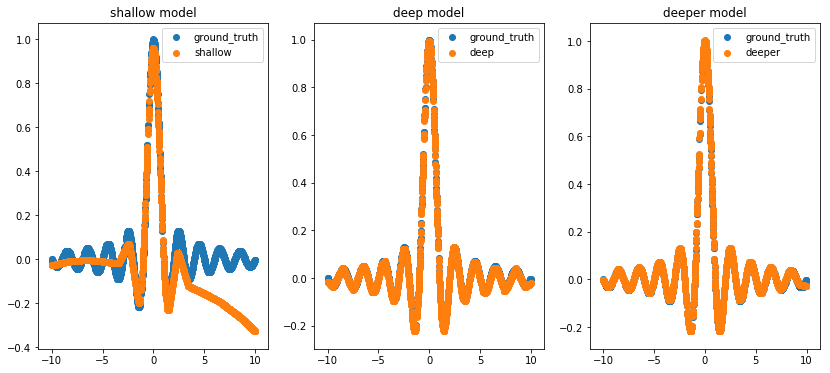

epoch: 9301 | shallow loss: 0.00136 | deep loss: 0.0000 | deeper loss : 0.0000


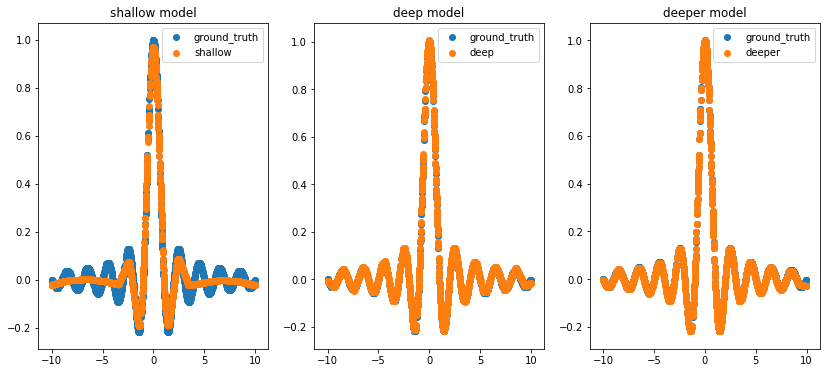

epoch: 9401 | shallow loss: 0.00127 | deep loss: 0.0000 | deeper loss : 0.0001


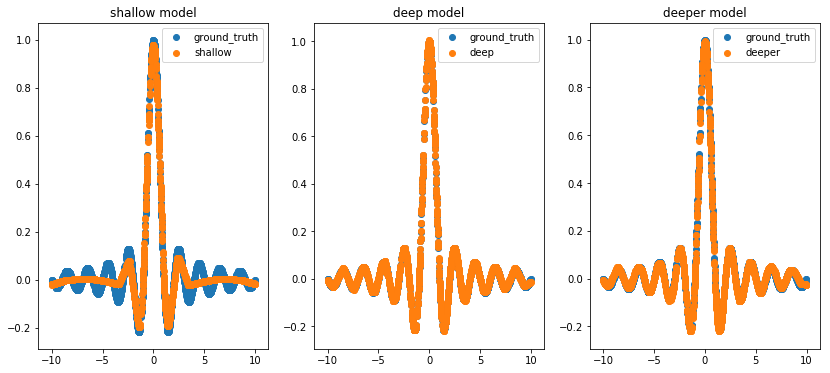

epoch: 9501 | shallow loss: 0.01115 | deep loss: 0.0000 | deeper loss : 0.0000


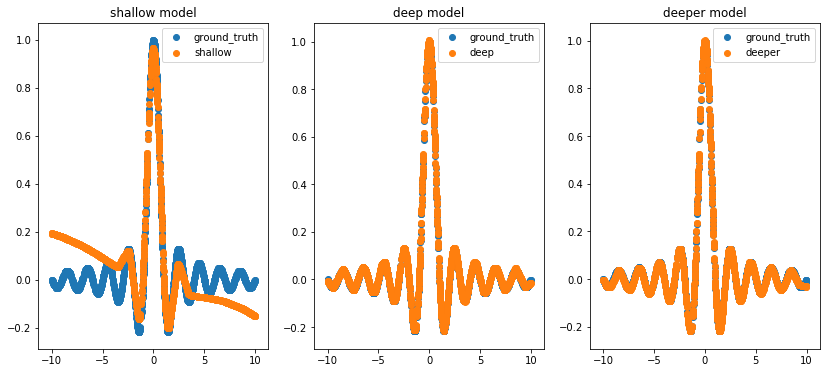

epoch: 9601 | shallow loss: 0.00135 | deep loss: 0.0000 | deeper loss : 0.0000


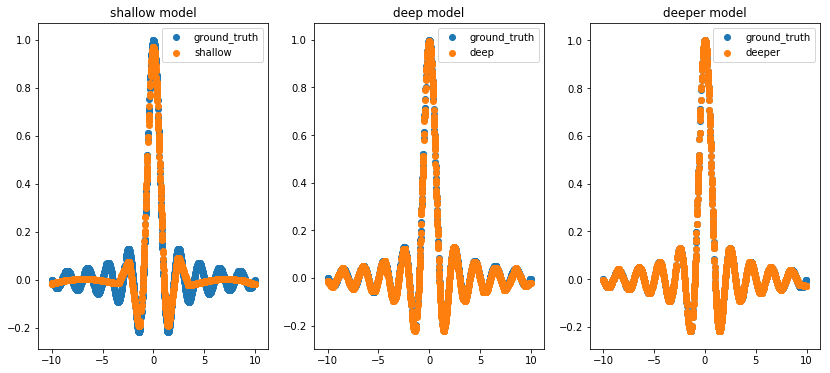

epoch: 9701 | shallow loss: 0.13303 | deep loss: 0.0000 | deeper loss : 0.0000


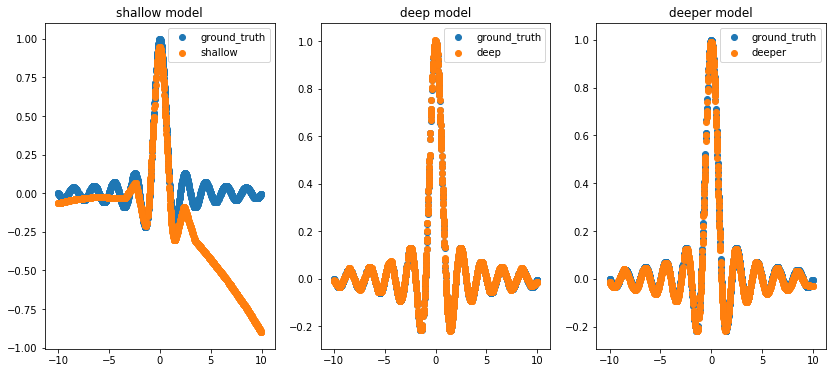

epoch: 9801 | shallow loss: 0.00134 | deep loss: 0.0001 | deeper loss : 0.0000


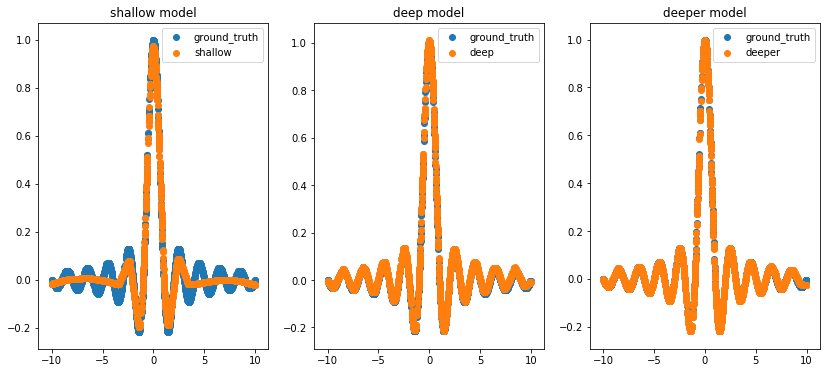

epoch: 9901 | shallow loss: 0.00641 | deep loss: 0.0000 | deeper loss : 0.0000


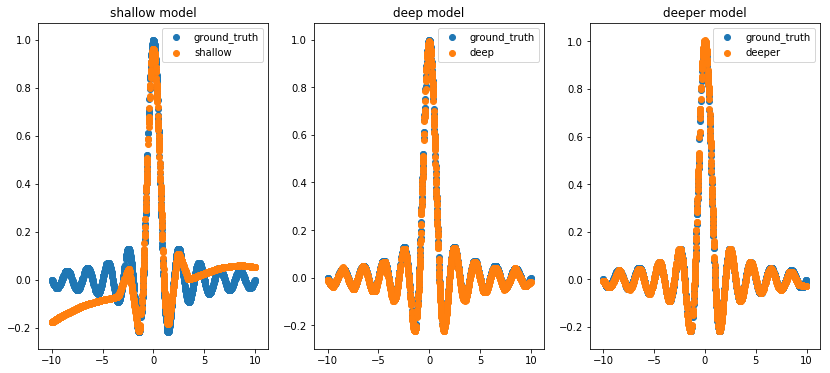

In [9]:
print('start')
loss_shallow_list = []
loss_deep_list = []
loss_deeper_list = []

for epoch in range(EPOCH):
    pred_shallow = shallow(train_x)
    optim_shallow.zero_grad()
    loss_shallow = loss_func(pred_shallow, train_y)
    loss_shallow.backward()
    optim_shallow.step()
    loss_shallow_list.append(loss_shallow.data[0])
    
    pred_deep = deep(train_x)
    optim_deep.zero_grad()
    loss_deep = loss_func(pred_deep, train_y)
    loss_deep.backward()
    optim_deep.step()
    loss_deep_list.append(loss_deep.data[0])
    
    pred_deeper = deeper(train_x)
    optim_deeper.zero_grad()
    loss_deeper = loss_func(pred_deeper, train_y)
    loss_deeper.backward()
    optim_deeper.step()
    loss_deeper_list.append(loss_deeper.data[0])
    
    if epoch % 100 == 1:
        
        print('epoch: %4d | shallow loss: %.5f | deep loss: %.4f | deeper loss : %.4f' 
              % (epoch, loss_shallow.data[0], loss_deep.data[0], loss_deeper.data[0]))
        fig, ax = plt.subplots(1, 3, figsize=(14,6))
        ax[0].scatter(train_x.data, train_y.data, label="ground_truth")
        ax[0].scatter(train_x.data, pred_shallow, label="shallow")
        ax[1].scatter(train_x.data, train_y.data, label="ground_truth")
        ax[1].scatter(train_x.data, pred_deep, label="deep")
        ax[2].scatter(train_x.data, train_y.data, label="ground_truth")
        ax[2].scatter(train_x.data, pred_deeper, label="deeper")
        ax[0].set_title("shallow model")
        ax[1].set_title("deep model")
        ax[2].set_title("deeper model")
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        plt.show()

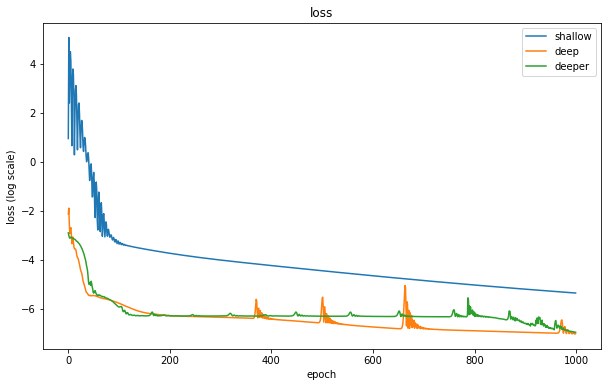

In [13]:
fig = plt.figure(figsize=(10,6))
num_show = 1000
plt.plot(np.arange(num_show), np.log(np.array(loss_shallow_list[:num_show])), label='shallow')
plt.plot(np.arange(num_show), np.log(np.array(loss_deep_list[:num_show])), label='deep')
plt.plot(np.arange(num_show), np.log(np.array(loss_deeper_list[:num_show])), label='deeper')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss (log scale)')
plt.legend()
plt.show()
        